In [291]:
import pandas as pd
import numpy as np
import os


main_data = pd.read_csv(r"C:\Users\sahab\Desktop\Участники anonimized.csv")
main_data.head(5)

,ФИО,Пол,Роль в мероприятии,Список компетенций,Должность,Категория,Начало трудового стажа,Место работы,Профессия,Дата рождения,Начало трудовой деятельности в РОСАТОМ,Образование,Место образования,Год оканчания,Специальность
0,ФИО_0,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,1993-06-01,АО Чепецкий механический завод,Промышленная автоматика,1975-04-14,2001-01-25,NaN,NaN,NaN,NaN
1,ФИО_1,1,Участник мероприятия,Управление качеством;,Главный специалист,NaN,2000-08-01,Акционерное общество Научно-исследовательский...,NaN,1977-07-19,2021-09-14,NaN,NaN,NaN,NaN
2,ФИО_2,0,Участник мероприятия,Сварочные технологии;,Электрогазосварщик,NaN,NaN,"""Филиал Акционерного общества """"Русатом Инфрас...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ФИО_3,0,Участник мероприятия,Инженер-конструктор;,инженер-конструктор,NaN,июл.05,"""Акционерное Общество """"Машиностроительный зав...",NaN,23.06.1986,NaN,NaN,NaN,NaN,NaN
4,ФИО_4,0,Участник мероприятия,Геодезия;,Мастер-лаборант,NaN,NaN,ОБПОУ Курский монтажный техникум,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
dir_path = r"C:\Users\sahab\Desktop\пизда_19_05"
files = os.listdir(dir_path)

In [293]:
data_list = []

for c, i in enumerate(files):
    data_list.append((pd.read_csv(dir_path + "/" + i).columns[:5], i, c))
data_list

[(Index(['№', 'ФИО', 'Компетенция', 'Баллы, ед.', 'Баллы, %'], dtype='object'),
  'Аддитивные технологии.csv',
  0),
 (Index(['№', 'ФИО', 'Компетенция', 'Баллы, ед.', 'Баллы, %'], dtype='object'),
  'Анатилический контроль.csv',
  1),
 (Index(['№', 'Название команды', 'ФИО участников', 'Компетенция', 'Баллы, ед.'], dtype='object'),
  'Бетонные строительные работы.csv',
  2),
 (Index(['№', 'ФИО', 'Компетенция', 'Баллы, ед.', 'Баллы, %'], dtype='object'),
  'Водитель спецавтомобиля.csv',
  3),
 (Index(['№', 'Название команды', 'ФИО участников', 'Компетенция', 'Баллы, ед.'], dtype='object'),
  'Вывод из эксплуатации объектов использования атомной энергии.csv',
  4),
 (Index(['№', 'Название команды', 'ФИО участников', 'Компетенция', 'Баллы, ед.'], dtype='object'),
  'Геодезия.csv',
  5),
 (Index(['№', 'ФИО', 'Компетенция', 'Баллы, ед.', 'Баллы, %'], dtype='object'),
  'Изготовление прототипов.csv',
  6),
 (Index(['№', 'ФИО', 'Компетенция', 'Баллы, ед.', 'Баллы, %'], dtype='object'),
  'Инж

In [294]:
# display(*data_list)

In [295]:
huevie_ind = []
for i in data_list:
    if 'Название команды' in i[0][1]:
        huevie_ind.append(i[2])
huevie_ind

[2, 4, 5, 9, 10, 11, 13, 15, 20, 22, 27, 29, 30, 33, 34, 36]

In [296]:
data_df_list = []

for c, i in enumerate(files):
    data_df_list.append((pd.read_csv(dir_path + "/" + i), i, c))


huevie_data = []
for i in huevie_ind:
    huevie_data.append(data_df_list[i])

In [297]:
# display(*huevie_data)

In [298]:
# huevie_data[10][0]

In [299]:
# huevie_data

In [300]:
new_ne_huevie_data = []

for i in huevie_data:
    data_to_merge_copy = i[0].copy()
#     print(data_to_merge_copy)
    data_to_merge_copy["count_users"] = [
    len(i) for i in data_to_merge_copy["ФИО участников"].str.split(";")\
    .to_numpy()\
    .tolist()
    ]
    records = data_to_merge_copy.to_dict(orient='records')
    
    new_records = []
    for rec in records:
        users_names = rec['ФИО участников'].split(";")
        for c in range(rec["count_users"]):
            new_dict = rec.copy()
            new_dict["ФИО"] = users_names[c]
            new_records.append(new_dict)
    new_dataframe = pd.DataFrame.from_records(new_records)
    new_ne_huevie_data.append(new_dataframe)
#     new_ne_huevie_data.append(pd.DataFrame(new_records))


In [301]:
names_set = set()
lists_of_sets = []
for i in new_ne_huevie_data:
    lists_of_sets.append(set(i.columns))
u = set.intersection(*lists_of_sets)
# u

In [302]:
ne_huevie_ind = []
for i in data_list:
    if 'Название команды' not in i[0][1]:
        ne_huevie_ind.append(i[2])
# ne_huevie_ind
data_df_list = []

for c, i in enumerate(files):
    data_df_list.append((pd.read_csv(dir_path + "/" + i), i, c))

ne_huevie_data = []
for i in ne_huevie_ind:
    ne_huevie_data.append(data_df_list[i][0])

In [303]:
# new_ne_huevie_data

In [304]:
# ne_huevie_data

In [305]:
cols = [
    'ФИО',
    'Компетенция',
    'Баллы, ед.',
    'Баллы, %',
#     'Баллы по ключевым навыкам',
#     'Максимальное значение',
#     'Результат'
]

In [306]:
full_data = ne_huevie_data + new_ne_huevie_data

In [307]:
new_full_data = []
for i in full_data:
    new_data_batch = i[cols]
    new_full_data.append(new_data_batch)

In [308]:
# new_full_data

In [309]:
# display(*new_full_data)

In [310]:
concated_full_competition_data = pd.concat([*new_full_data], ignore_index=True)

In [311]:
merged_data = pd.merge(main_data, concated_full_competition_data, on='ФИО', how='inner')
# merged_data

In [312]:
merged_data.to_csv(r"C:\Users\sahab\Desktop\пизда_19_05_ответ\merged_data.csv")

In [313]:
merged_data_to_vis_cols = ['Пол', 'Роль в мероприятии', 'Должность',
       'Категория', 'Место работы', 'Профессия', 'Специальность',
       'Компетенция', 'Баллы, ед.', 'Баллы, %']

In [314]:
merged_data

,ФИО,Пол,Роль в мероприятии,Список компетенций,Должность,Категория,Начало трудового стажа,Место работы,Профессия,Дата рождения,Начало трудовой деятельности в РОСАТОМ,Образование,Место образования,Год оканчания,Специальность,Компетенция,"Баллы, ед.","Баллы, %"
0,ФИО_0,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,1993-06-01,АО Чепецкий механический завод,Промышленная автоматика,1975-04-14,2001-01-25,NaN,NaN,NaN,NaN,Цифровое ПСР-Предприятие (Lean Smart Plant),106,"63,9"
1,ФИО_1,1,Участник мероприятия,Управление качеством;,Главный специалист,NaN,2000-08-01,Акционерное общество Научно-исследовательский...,NaN,1977-07-19,2021-09-14,NaN,NaN,NaN,NaN,Управление качеством,100,"19,18"
2,ФИО_2,0,Участник мероприятия,Сварочные технологии;,Электрогазосварщик,NaN,NaN,"""Филиал Акционерного общества """"Русатом Инфрас...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сварочные технологии,100,"13,78"
3,ФИО_3,0,Участник мероприятия,Инженер-конструктор;,инженер-конструктор,NaN,июл.05,"""Акционерное Общество """"Машиностроительный зав...",NaN,23.06.1986,NaN,NaN,NaN,NaN,NaN,Инженер-конструктор,100,"38,48"
4,ФИО_4,0,Участник мероприятия,Геодезия;,Мастер-лаборант,NaN,NaN,ОБПОУ Курский монтажный техникум,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Геодезия,100,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,ФИО_706,1,Участник мероприятия,Квантовые технологии;,NaN,NaN,NaN,Национальный Исследовательский Томский Государ...,NaN,2001-08-23,NaN,NaN,NaN,NaN,NaN,Квантовые технологии,72,"40,5"
444,ФИО_707,0,Участник мероприятия,Неразрушающий контроль;,Дефектоскопист,Специалист (рабочие специальности),2018-08-03,Управление предприятия,Неразрушающий контроль,1984-08-03,2004-04-27,NaN,NaN,NaN,NaN,Неразрушающий контроль,100,"54,1"
445,ФИО_710,1,Участник мероприятия,Аналитический контроль;,Лаборант химического анализа,NaN,2016-10-10,Центральная научно-исследовательская лаборатория,NaN,1993-02-01,2021-05-14,Высшее,ИрГУПС,2016,Эксплуатация железных дорог,Аналитический контроль,100,"50,09"
446,ФИО_711,0,Участник мероприятия,Токарные работы на станках с ЧПУ;,токарь,NaN,NaN,"""АО """"Опытное Конструкторское Бюро Машинострое...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Токарные работы на станках с ЧПУ,100,"56,56"


In [315]:
merged_to_vis = merged_data[merged_data_to_vis_cols]

In [316]:
cols_to_enc = ['Пол', 'Роль в мероприятии', 'Должность',
       'Категория', 'Место работы', 'Профессия', 'Специальность',
       'Компетенция']

In [317]:
from sklearn.preprocessing import LabelEncoder


merged_to_vis['Баллы, ед.'] = merged_to_vis['Баллы, ед.'].apply(lambda x: float(str(x).replace(',', '.')))
merged_to_vis['Баллы, %'] = merged_to_vis['Баллы, %'].apply(lambda x: float(str(x).replace(',', '.').replace('%', '')))
merged_to_vis_label_na = merged_to_vis[cols_to_enc].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

merged_to_vis_label_na['Баллы, ед.'] = merged_to_vis['Баллы, ед.']
merged_to_vis_label_na['Баллы, %'] = merged_to_vis['Баллы, %']
merged_to_vis_label_na['Баллы, %'] = merged_to_vis_label_na['Баллы, %'].fillna(merged_to_vis_label_na['Баллы, %'].median())
merged_to_vis_label_na['Баллы, ед.'] = merged_to_vis_label_na['Баллы, ед.'].fillna(merged_to_vis_label_na['Баллы, ед.'].median())

C:\Users\sahab\AppData\Local\Temp\ipykernel_44412\1122221978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_to_vis['Баллы, ед.'] = merged_to_vis['Баллы, ед.'].apply(lambda x: float(str(x).replace(',', '.')))
C:\Users\sahab\AppData\Local\Temp\ipykernel_44412\1122221978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_to_vis['Баллы, %'] = merged_to_vis['Баллы, %'].apply(lambda x: float(str(x).replace(',', '.').replace('%', '')))


In [318]:
merged_to_vis_label_na

,Пол,Роль в мероприятии,Должность,Категория,Место работы,Профессия,Специальность,Компетенция,"Баллы, ед.","Баллы, %"
0,0,0,70.0,0.0,146.0,14.0,NaN,36,106.0,63.90
1,1,0,34.0,NaN,151.0,NaN,NaN,34,100.0,19.18
2,0,0,195.0,NaN,92.0,NaN,NaN,26,100.0,13.78
3,0,0,237.0,NaN,37.0,NaN,NaN,7,100.0,38.48
4,0,0,127.0,NaN,221.0,NaN,NaN,5,100.0,48.00
...,...,...,...,...,...,...,...,...,...,...
443,1,0,NaN,NaN,212.0,NaN,NaN,12,72.0,40.50
444,0,0,41.0,3.0,277.0,10.0,NaN,16,100.0,54.10
445,1,0,116.0,NaN,343.0,NaN,59.0,1,100.0,50.09
446,0,0,258.0,NaN,21.0,NaN,NaN,32,100.0,56.56


In [319]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=1)
imputed_merged_to_vis_label_na = imputer.fit_transform(merged_to_vis_label_na)
# imputed_merged_to_vis_label_na_df[9] = merged_to_vis['Баллы, %']
# imputed_merged_to_vis_label_na_df[10] = merged_to_vis['Баллы, ед.']
# imputed_merged_to_vis_label_na_df[10] = imputed_merged_to_vis_label_na_df[10].apply(lambda x: float(str(x).replace(',', '.')))
# imputed_merged_to_vis_label_na_df[9] = imputed_merged_to_vis_label_na_df[9].apply(lambda x: float(str(x).replace(',', '.').replace('%', '')))
imputed_merged_to_vis_label_na_df = pd.DataFrame(imputed_merged_to_vis_label_na)

In [320]:
imputed_merged_to_vis_label_na_df.columns = merged_data_to_vis_cols

In [321]:
imputed_merged_to_vis_label_na_df

,Пол,Роль в мероприятии,Должность,Категория,Место работы,Профессия,Специальность,Компетенция,"Баллы, ед.","Баллы, %"
0,0.0,0.0,70.0,0.0,146.0,14.0,22.0,36.0,106.0,63.90
1,1.0,0.0,34.0,3.0,151.0,16.0,22.0,34.0,100.0,19.18
2,0.0,0.0,195.0,4.0,92.0,22.0,46.0,26.0,100.0,13.78
3,0.0,0.0,237.0,3.0,37.0,15.0,71.0,7.0,100.0,38.48
4,0.0,0.0,127.0,3.0,221.0,0.0,56.0,5.0,100.0,48.00
...,...,...,...,...,...,...,...,...,...,...
443,1.0,0.0,179.0,0.0,212.0,4.0,30.0,12.0,72.0,40.50
444,0.0,0.0,41.0,3.0,277.0,10.0,38.0,16.0,100.0,54.10
445,1.0,0.0,116.0,3.0,343.0,2.0,59.0,1.0,100.0,50.09
446,0.0,0.0,258.0,3.0,21.0,15.0,20.0,32.0,100.0,56.56


In [322]:
# from sklearn import preprocessing

# merged_to_vis = merged_to_vis.fillna('0')
# merged_to_vis["role"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Роль в мероприятии"])
# merged_to_vis["cometentions"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Список компетенций"])
# merged_to_vis["job"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Должность"])
# merged_to_vis["cat"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Категория"])
# merged_to_vis["job_name"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Место работы"])
# merged_to_vis["proff"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Профессия"])
# merged_to_vis["spec"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Специальность"])
# merged_to_vis["cometentions_competition"] = preprocessing.LabelEncoder().fit_transform(merged_to_vis["Компетенция"])

In [323]:
# cols_nums = [
#     'Баллы, ед.', 'Баллы, %', 'role', 'cometentions', 'job',
#     'cat', 'job_name', 'proff', 'spec', 'cometentions_competition',
#     'Пол'
# ]

In [324]:
# merged_to_vis_coded = merged_to_vis[cols_nums]
# merged_to_vis_coded

In [325]:
imputed_merged_to_vis_label_na_df

,Пол,Роль в мероприятии,Должность,Категория,Место работы,Профессия,Специальность,Компетенция,"Баллы, ед.","Баллы, %"
0,0.0,0.0,70.0,0.0,146.0,14.0,22.0,36.0,106.0,63.90
1,1.0,0.0,34.0,3.0,151.0,16.0,22.0,34.0,100.0,19.18
2,0.0,0.0,195.0,4.0,92.0,22.0,46.0,26.0,100.0,13.78
3,0.0,0.0,237.0,3.0,37.0,15.0,71.0,7.0,100.0,38.48
4,0.0,0.0,127.0,3.0,221.0,0.0,56.0,5.0,100.0,48.00
...,...,...,...,...,...,...,...,...,...,...
443,1.0,0.0,179.0,0.0,212.0,4.0,30.0,12.0,72.0,40.50
444,0.0,0.0,41.0,3.0,277.0,10.0,38.0,16.0,100.0,54.10
445,1.0,0.0,116.0,3.0,343.0,2.0,59.0,1.0,100.0,50.09
446,0.0,0.0,258.0,3.0,21.0,15.0,20.0,32.0,100.0,56.56


In [286]:
# import pandas as pd

# merged_to_vis_coded['Баллы, ед.'] = merged_to_vis_coded['Баллы, ед.'].apply(lambda x: float(str(x).replace(',', '.')))
# merged_to_vis_coded['Баллы, %'] = merged_to_vis_coded['Баллы, %'].apply(lambda x: float(str(x).replace(',', '.').replace('%', '')))

# print(merged_to_vis_coded)

In [287]:
from sklearn.preprocessing import StandardScaler


imputed_merged_to_vis_label_na_df.columns = merged_data_to_vis_cols
imputed_merged_to_vis_label_na_df = imputed_merged_to_vis_label_na_df
imputed_merged_to_vis_label_na_df = imputed_merged_to_vis_label_na_df.drop(columns=['Роль в мероприятии', 'Должность', 'Профессия', 'Специальность', 'Баллы, %'])
scaler = StandardScaler()
merged_to_vis_coded_scaled = pd.DataFrame(scaler.fit_transform(imputed_merged_to_vis_label_na_df))
merged_to_vis_coded_scaled.columns = imputed_merged_to_vis_label_na_df.columns

In [288]:
merged_to_vis_coded_scaled.columns

Index(['Пол', 'Категория', 'Место работы', 'Компетенция', 'Баллы, ед.'], dtype='object')

In [289]:
merged_data

,ФИО,Пол,Роль в мероприятии,Список компетенций,Должность,Категория,Начало трудового стажа,Место работы,Профессия,Дата рождения,Начало трудовой деятельности в РОСАТОМ,Образование,Место образования,Год оканчания,Специальность,Компетенция,"Баллы, ед.","Баллы, %"
0,ФИО_0,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,1993-06-01,АО Чепецкий механический завод,Промышленная автоматика,1975-04-14,2001-01-25,NaN,NaN,NaN,NaN,Цифровое ПСР-Предприятие (Lean Smart Plant),106,"63,9"
1,ФИО_1,1,Участник мероприятия,Управление качеством;,Главный специалист,NaN,2000-08-01,Акционерное общество Научно-исследовательский...,NaN,1977-07-19,2021-09-14,NaN,NaN,NaN,NaN,Управление качеством,100,"19,18"
2,ФИО_2,0,Участник мероприятия,Сварочные технологии;,Электрогазосварщик,NaN,NaN,"""Филиал Акционерного общества """"Русатом Инфрас...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сварочные технологии,100,"13,78"
3,ФИО_3,0,Участник мероприятия,Инженер-конструктор;,инженер-конструктор,NaN,июл.05,"""Акционерное Общество """"Машиностроительный зав...",NaN,23.06.1986,NaN,NaN,NaN,NaN,NaN,Инженер-конструктор,100,"38,48"
4,ФИО_4,0,Участник мероприятия,Геодезия;,Мастер-лаборант,NaN,NaN,ОБПОУ Курский монтажный техникум,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Геодезия,100,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,ФИО_706,1,Участник мероприятия,Квантовые технологии;,NaN,NaN,NaN,Национальный Исследовательский Томский Государ...,NaN,2001-08-23,NaN,NaN,NaN,NaN,NaN,Квантовые технологии,72,"40,5"
444,ФИО_707,0,Участник мероприятия,Неразрушающий контроль;,Дефектоскопист,Специалист (рабочие специальности),2018-08-03,Управление предприятия,Неразрушающий контроль,1984-08-03,2004-04-27,NaN,NaN,NaN,NaN,Неразрушающий контроль,100,"54,1"
445,ФИО_710,1,Участник мероприятия,Аналитический контроль;,Лаборант химического анализа,NaN,2016-10-10,Центральная научно-исследовательская лаборатория,NaN,1993-02-01,2021-05-14,Высшее,ИрГУПС,2016,Эксплуатация железных дорог,Аналитический контроль,100,"50,09"
446,ФИО_711,0,Участник мероприятия,Токарные работы на станках с ЧПУ;,токарь,NaN,NaN,"""АО """"Опытное Конструкторское Бюро Машинострое...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Токарные работы на станках с ЧПУ,100,"56,56"


In [290]:
# new_users = pd.concat([merged_to_vis_coded_scaled, merged_data[[
#     'Пол', 'Роль в мероприятии', 'Список компетенций', 'Место работы',
#     'Компетенция', 'Профессия']
# ]], ignore_index=True, axis=1)

# new_users

,0,1,2,3,4,5,6,7,8,9,10
0,-0.536056,-1.185890,-0.198545,1.491070,0.632407,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,АО Чепецкий механический завод,Цифровое ПСР-Предприятие (Lean Smart Plant),Промышленная автоматика
1,1.865476,0.816417,-0.150662,1.312651,0.293599,1,Участник мероприятия,Управление качеством;,Акционерное общество Научно-исследовательский...,Управление качеством,NaN
2,-0.536056,1.483853,-0.715685,0.598977,0.293599,0,Участник мероприятия,Сварочные технологии;,"""Филиал Акционерного общества """"Русатом Инфрас...",Сварочные технологии,NaN
3,-0.536056,0.816417,-1.242402,-1.096000,0.293599,0,Участник мероприятия,Инженер-конструктор;,"""Акционерное Общество """"Машиностроительный зав...",Инженер-конструктор,NaN
4,-0.536056,0.816417,0.519705,-1.274419,0.293599,0,Участник мероприятия,Геодезия;,ОБПОУ Курский монтажный техникум,Геодезия,NaN
...,...,...,...,...,...,...,...,...,...,...,...
443,1.865476,-1.185890,0.433515,-0.649954,-1.287508,1,Участник мероприятия,Квантовые технологии;,Национальный Исследовательский Томский Государ...,Квантовые технологии,NaN
444,-0.536056,0.816417,1.055999,-0.293116,0.293599,0,Участник мероприятия,Неразрушающий контроль;,Управление предприятия,Неразрушающий контроль,Неразрушающий контроль
445,1.865476,0.816417,1.688059,-1.631256,0.293599,1,Участник мероприятия,Аналитический контроль;,Центральная научно-исследовательская лаборатория,Аналитический контроль,NaN
446,-0.536056,0.816417,-1.395628,1.134233,0.293599,0,Участник мероприятия,Токарные работы на станках с ЧПУ;,"""АО """"Опытное Конструкторское Бюро Машинострое...",Токарные работы на станках с ЧПУ,NaN


In [218]:
merged_to_vis_coded_scaled = pd.DataFrame(merged_to_vis_coded_scaled)

In [329]:
us_readed = pd.read_csv(r"C:\Users\sahab\Desktop\csv\user_cluster.csv", index_col='Unnamed: 0')
us_readed.head()

,Пол,Категория,Место работы,Компетенция,"Баллы, ед.",clusters,family
0,-0.536056,-1.185890,-0.198545,1.491070,0.632407,1,ФИО_0
1,1.865476,0.816417,-0.150662,1.312651,0.293599,0,ФИО_1
2,-0.536056,1.483853,-0.715685,0.598977,0.293599,3,ФИО_2
3,-0.536056,0.816417,-1.242402,-1.096000,0.293599,0,ФИО_3
4,-0.536056,0.816417,0.519705,-1.274419,0.293599,0,ФИО_4


In [336]:
us_readed_cols = us_readed.columns.to_list()
us_cols = [
    'Пол_dec', 'Роль в мероприятии_dec', 'Список компетенций_dec', 'Место работы_dec',
    'Компетенция_dec', 'Профессия_dec'
]

new_users_cols = us_readed_cols + us_cols

In [337]:
new_users_cols

['Пол',
 'Категория',
 'Место работы',
 'Компетенция',
 'Баллы, ед.',
 'clusters',
 'family',
 'Пол_dec',
 'Роль в мероприятии_dec',
 'Список компетенций_dec',
 'Место работы_dec',
 'Компетенция_dec',
 'Профессия_dec']

In [338]:
new_data = pd.concat([
    us_readed, merged_data[[
    'Пол', 'Роль в мероприятии', 'Список компетенций', 'Место работы',
    'Компетенция', 'Профессия']
]], ignore_index=True, axis=1)

new_data.columns = new_users_cols

In [340]:
new_data.to_csv(r"C:\Users\sahab\Desktop\csv\new_us_dec_data.csv")

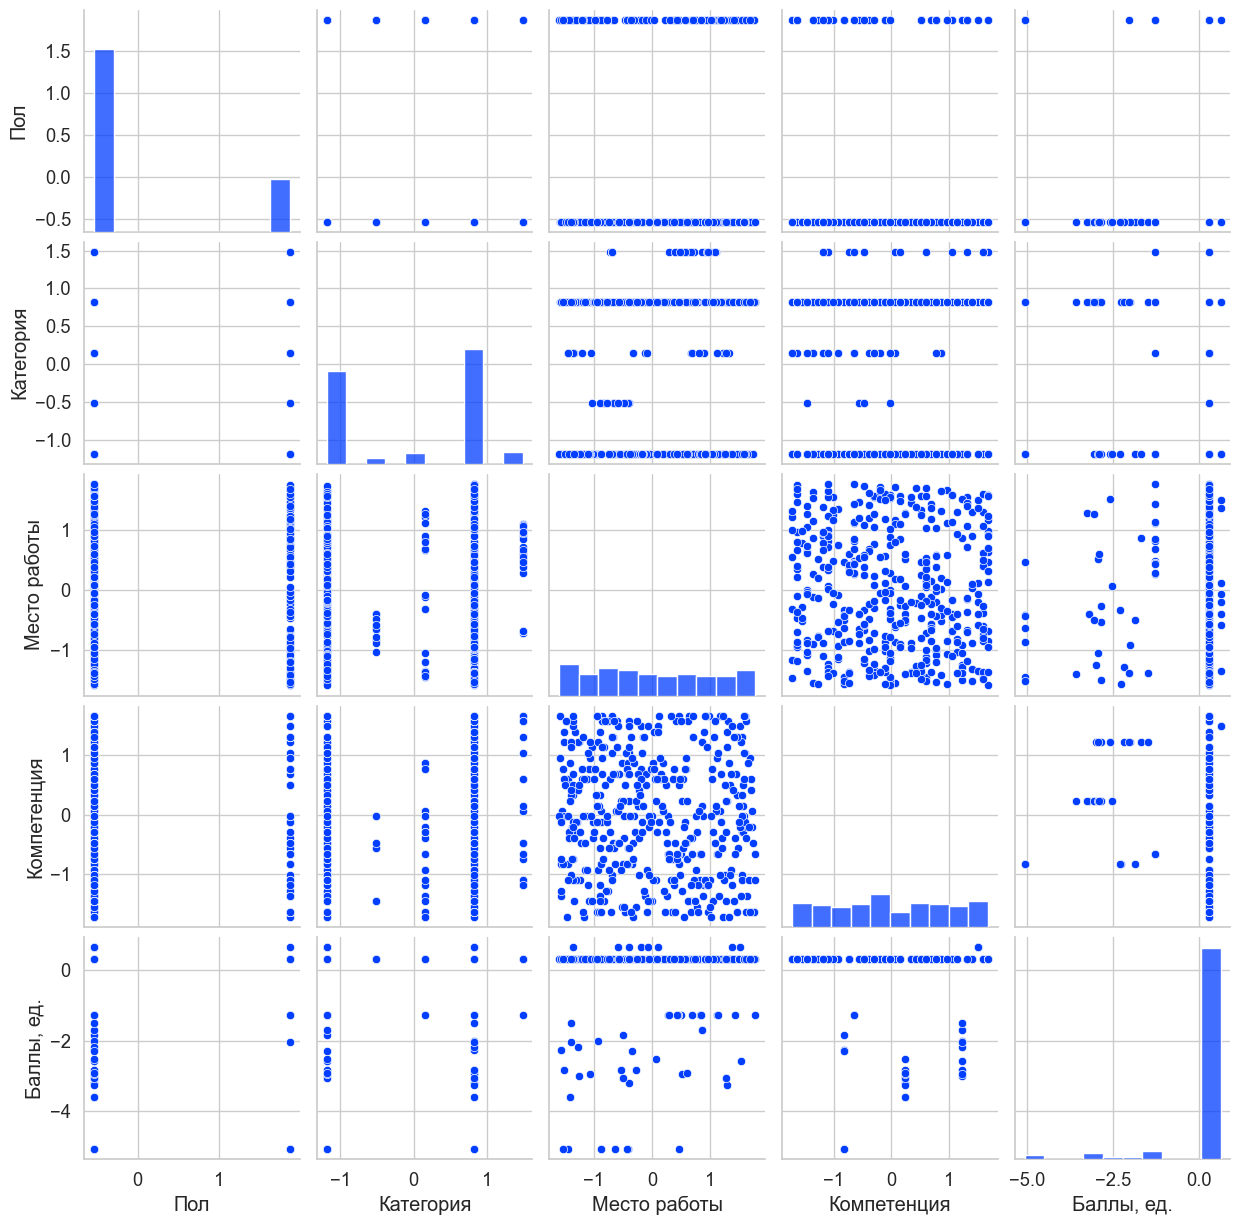

In [219]:
import seaborn as sns

sns.pairplot(merged_to_vis_coded_scaled, diag_kind="hist")

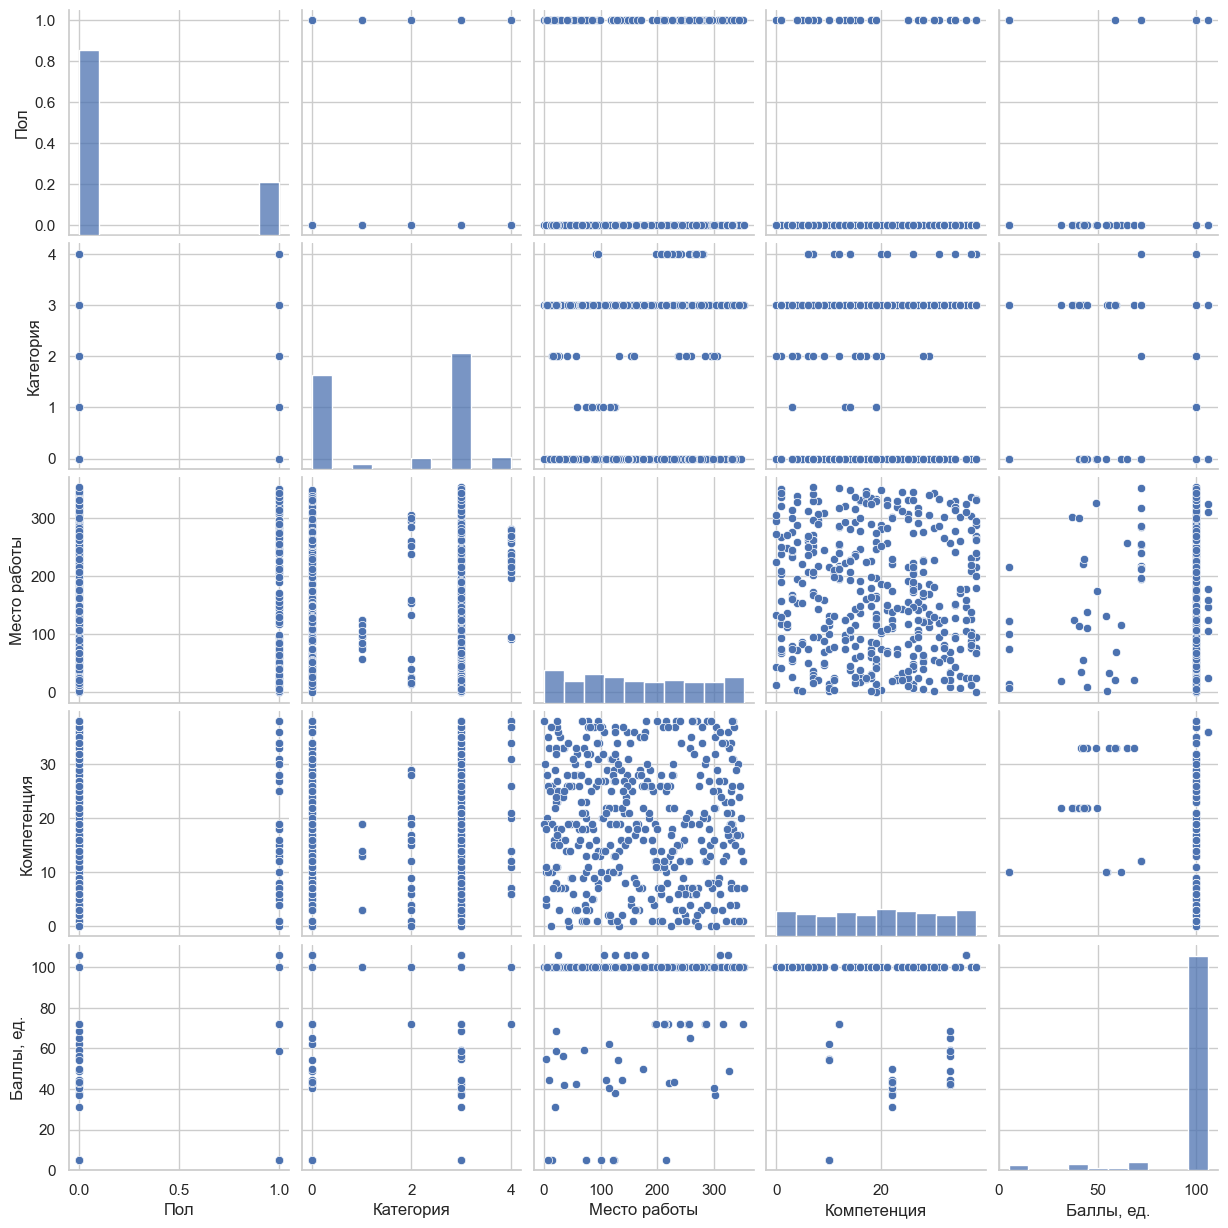

In [220]:
import seaborn as sns


sns.set(rc={'figure.figsize':(20,20)})
sns.set_style("whitegrid")
sns.pairplot(imputed_merged_to_vis_label_na_df, diag_kind="hist")

In [221]:
to_clast = merged_to_vis_coded_scaled.copy()
to_clast.cols = [i for i in range(len(to_clast.columns))]

C:\Users\sahab\AppData\Local\Temp\ipykernel_44412\2669488248.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  to_clast.cols = [i for i in range(len(to_clast.columns))]


In [222]:
cat_index = to_clast.cols[:-1]

In [223]:
cat_index

[0, 1, 2, 3]

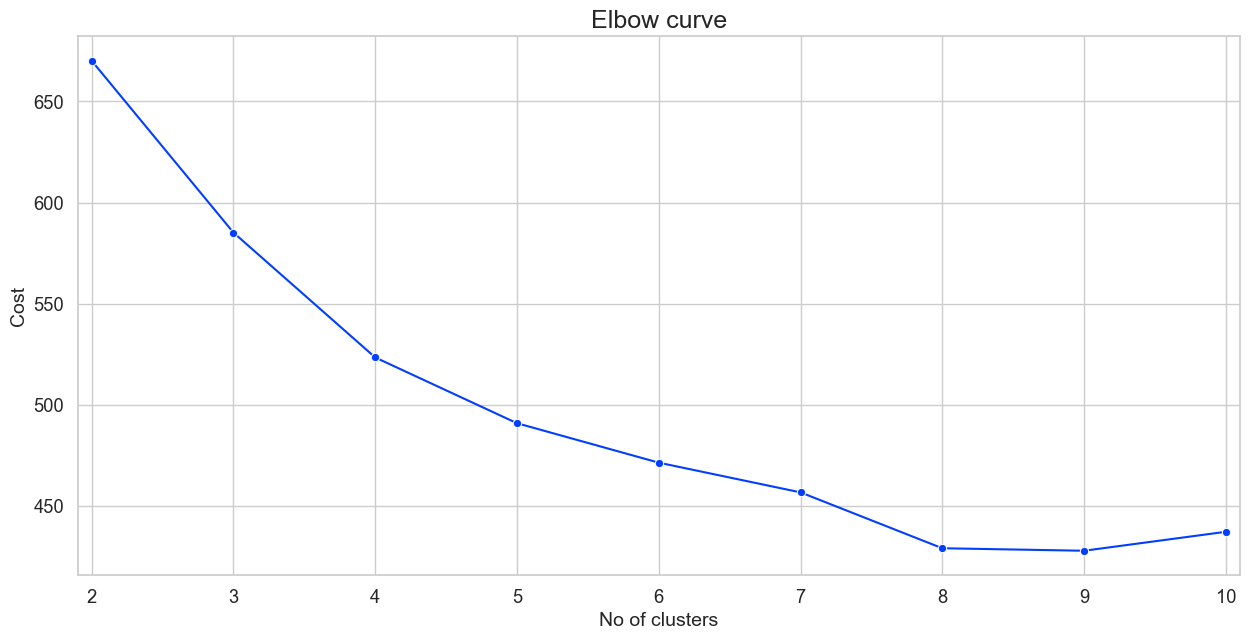

In [224]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt


def plot_elbow_curve(start, end, data):

    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=cat_index)
        cost_values.append(test_model.cost_)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    
    
plot_elbow_curve(2, 10, merged_to_vis_coded_scaled)

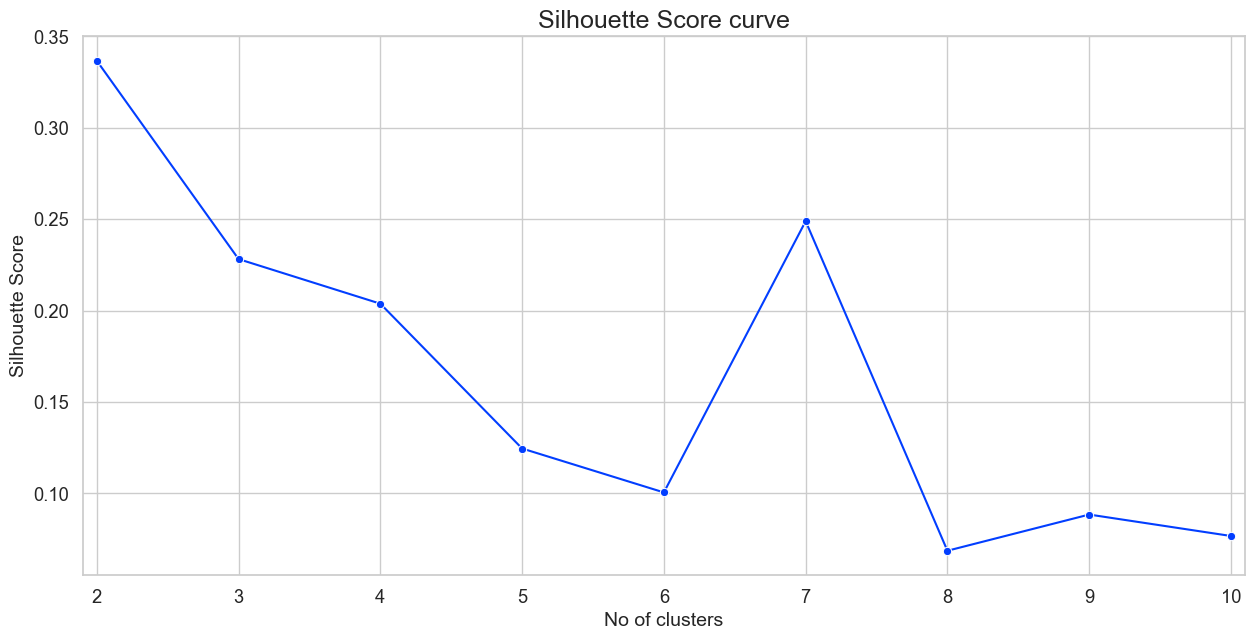

In [225]:
from sklearn.metrics import silhouette_score
def plot_silhouette_score_curve(start, end, data):
   
    no_of_clusters = list(range(start, end+1))
    silhouette_score_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_jobs=-1)
        test_model.fit_predict(data, categorical=cat_index)
        silhouette_score_values.append(silhouette_score(data, test_model.labels_))
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=silhouette_score_values, marker="o", dashes=False)
    ax.set_title('Silhouette Score curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Silhouette Score', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    
plot_silhouette_score_curve(2,10,merged_to_vis_coded_scaled)

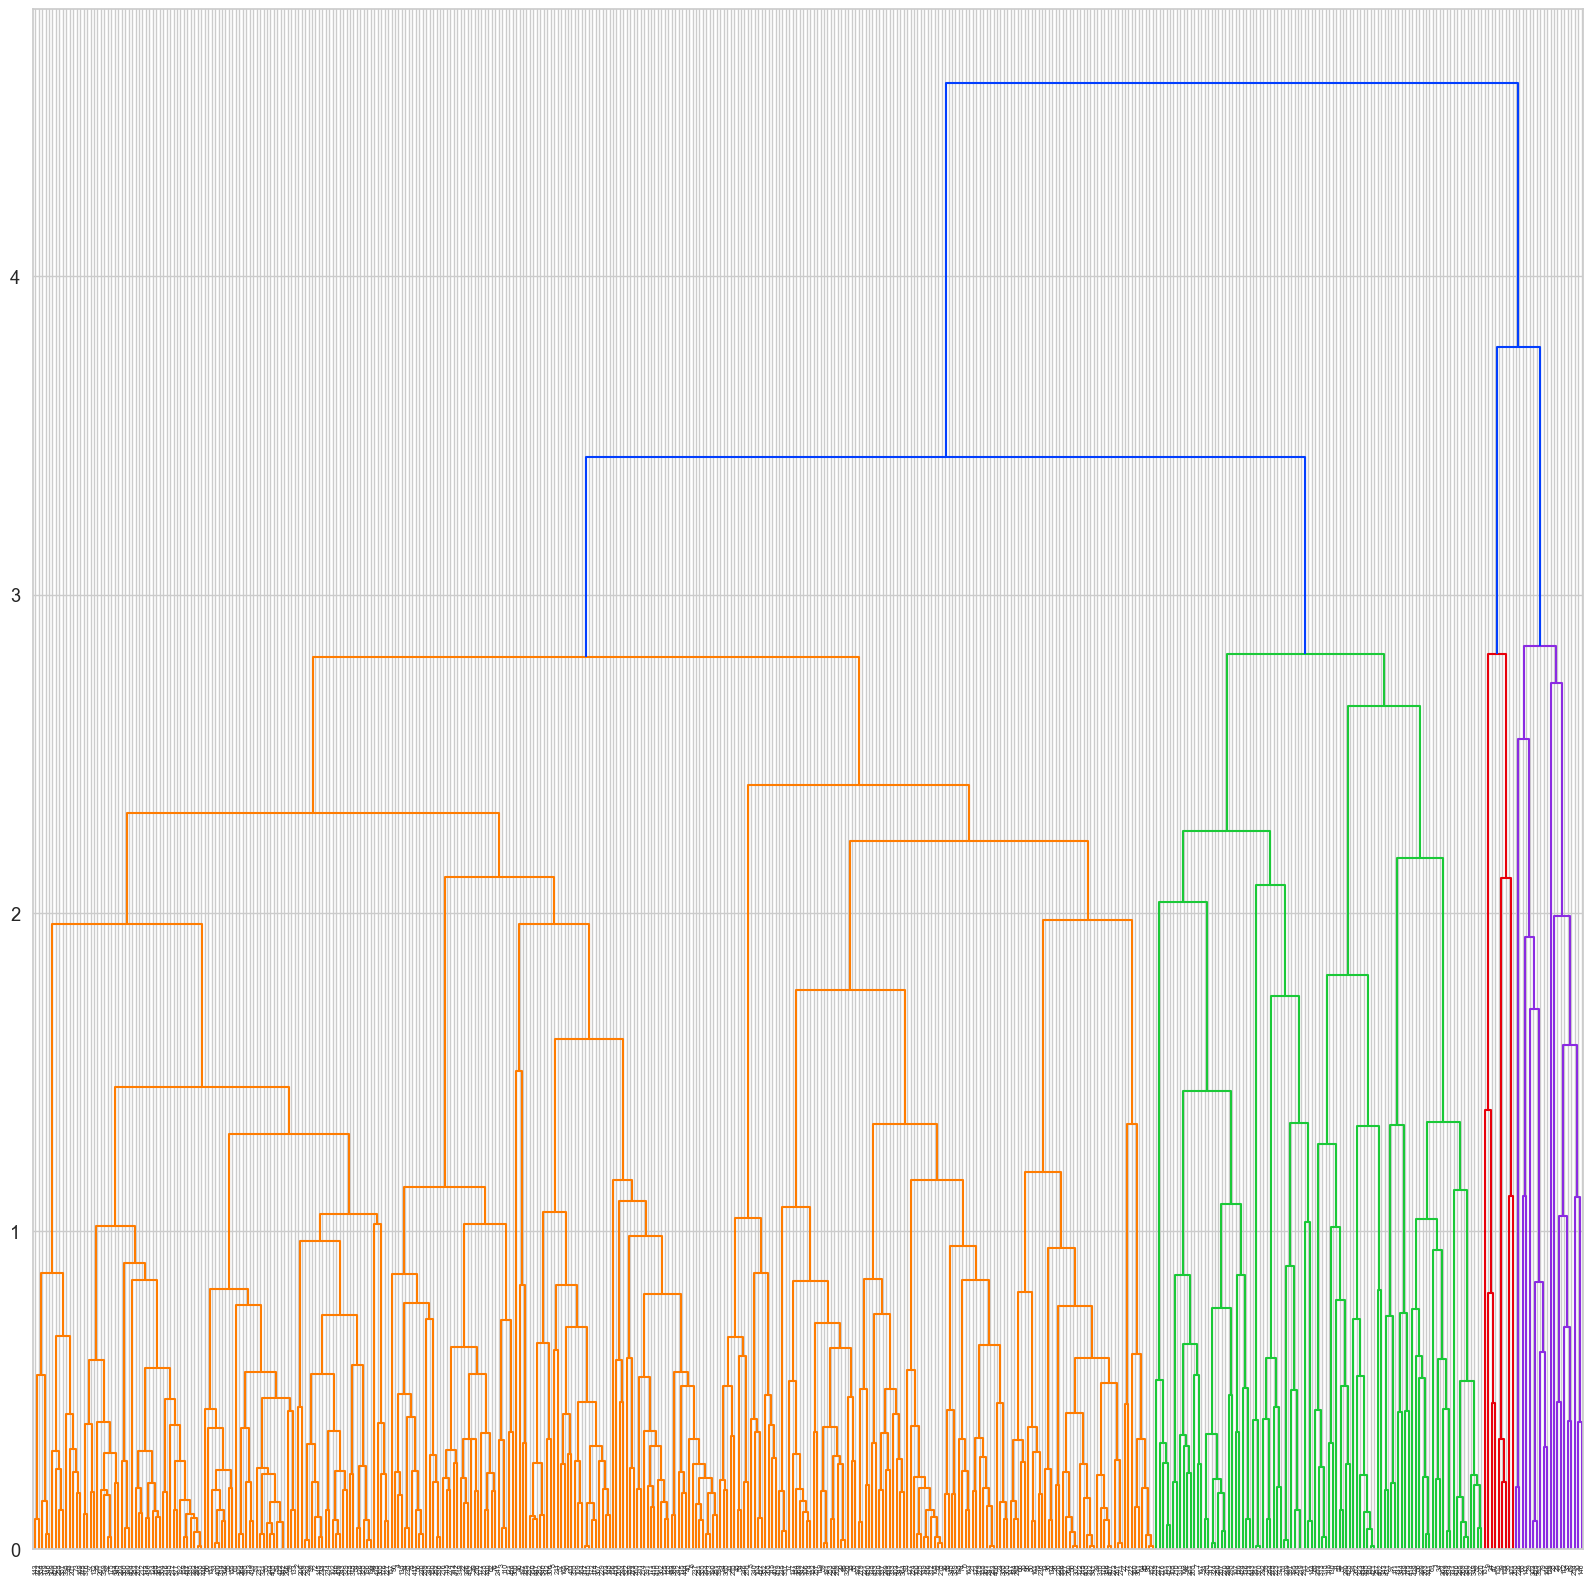

In [226]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy


clusters = hierarchy.linkage(merged_to_vis_coded_scaled, method="average")
dendrogram = hierarchy.dendrogram(clusters)

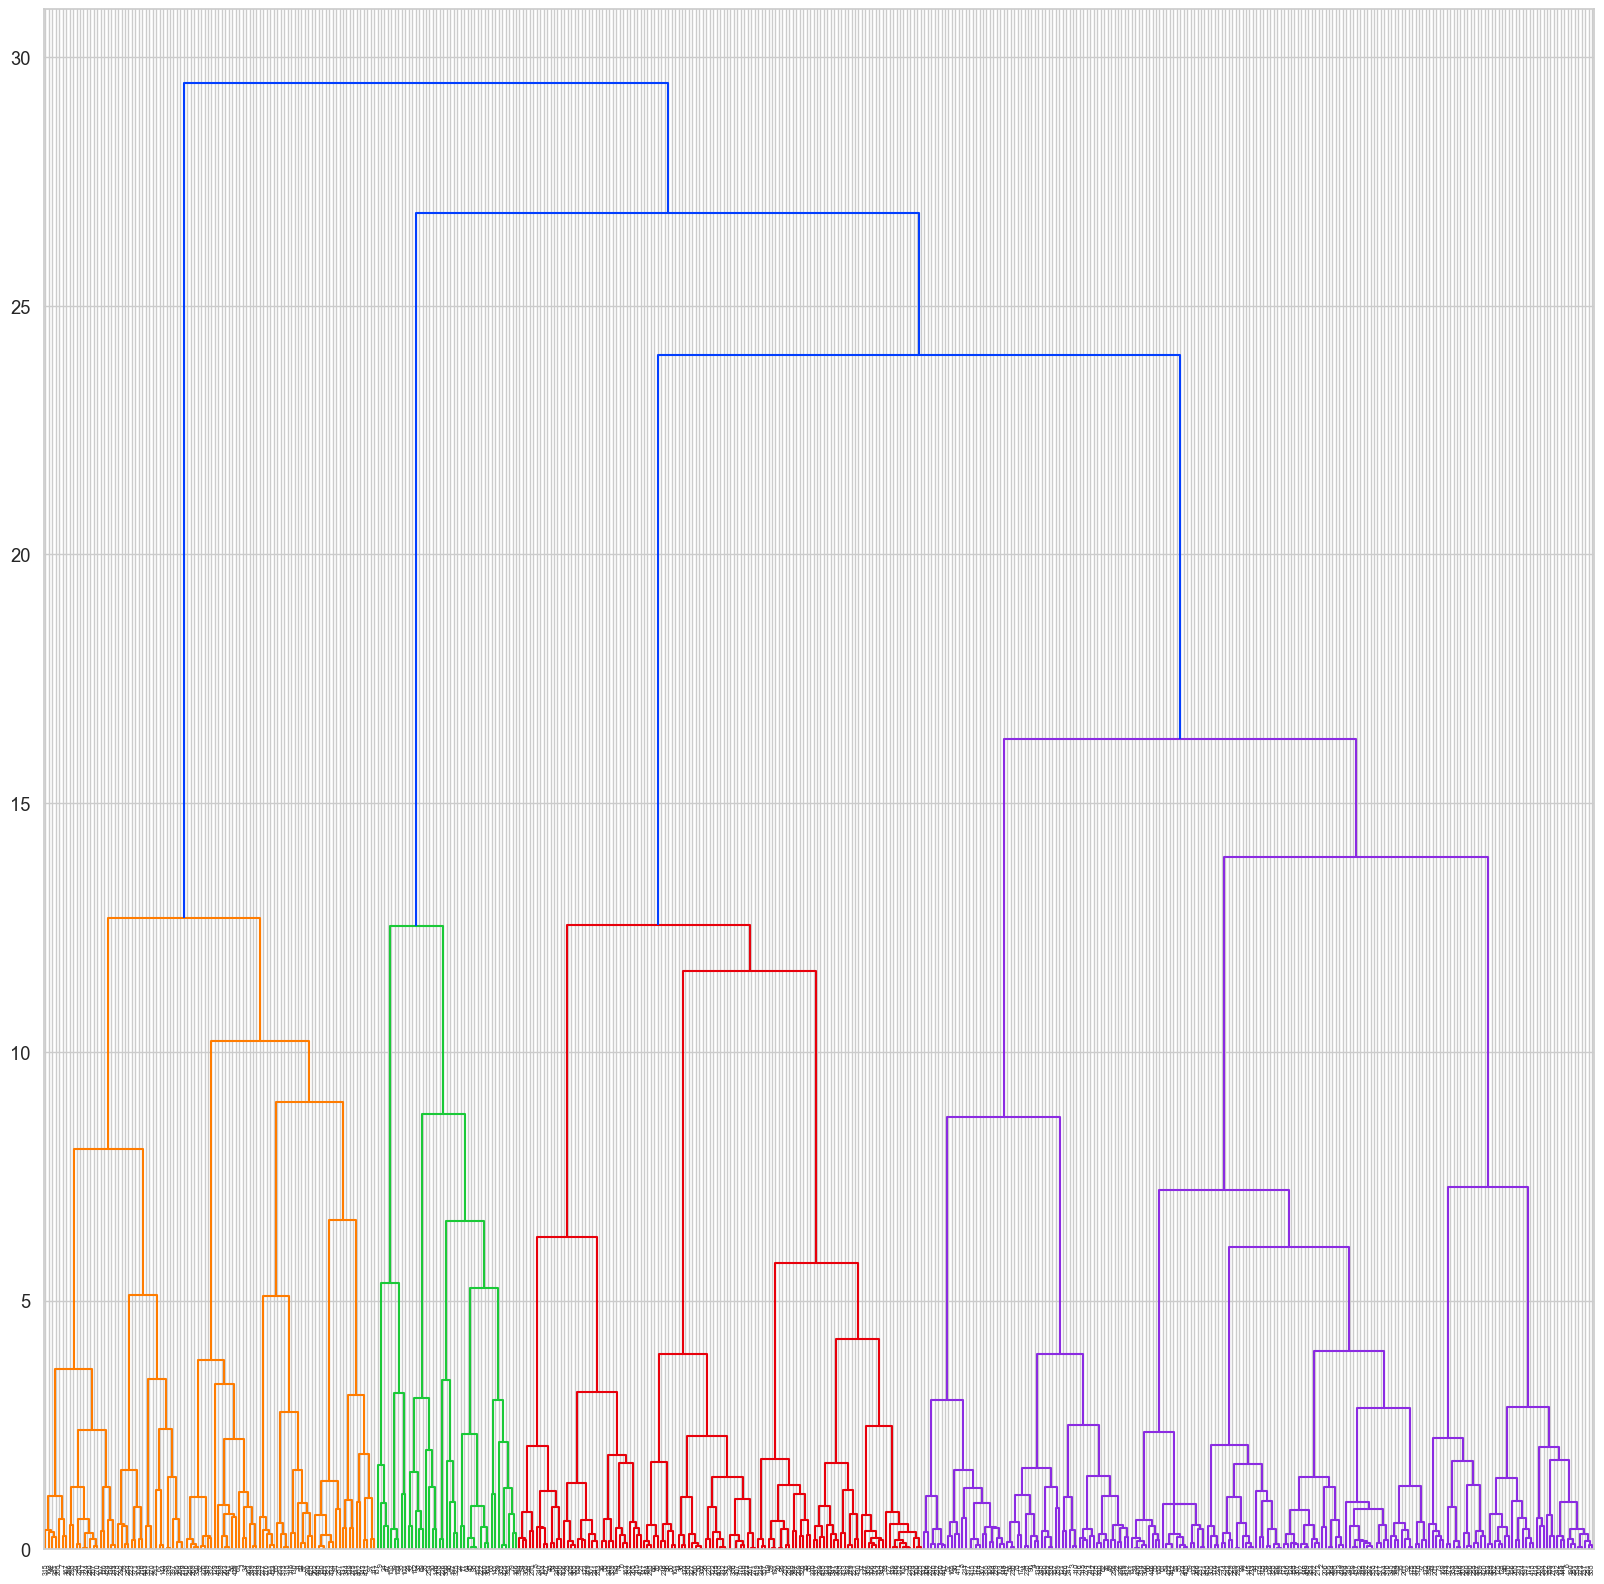

In [227]:
clusters = hierarchy.linkage(merged_to_vis_coded_scaled, method="ward")
dendrogram = hierarchy.dendrogram(clusters)

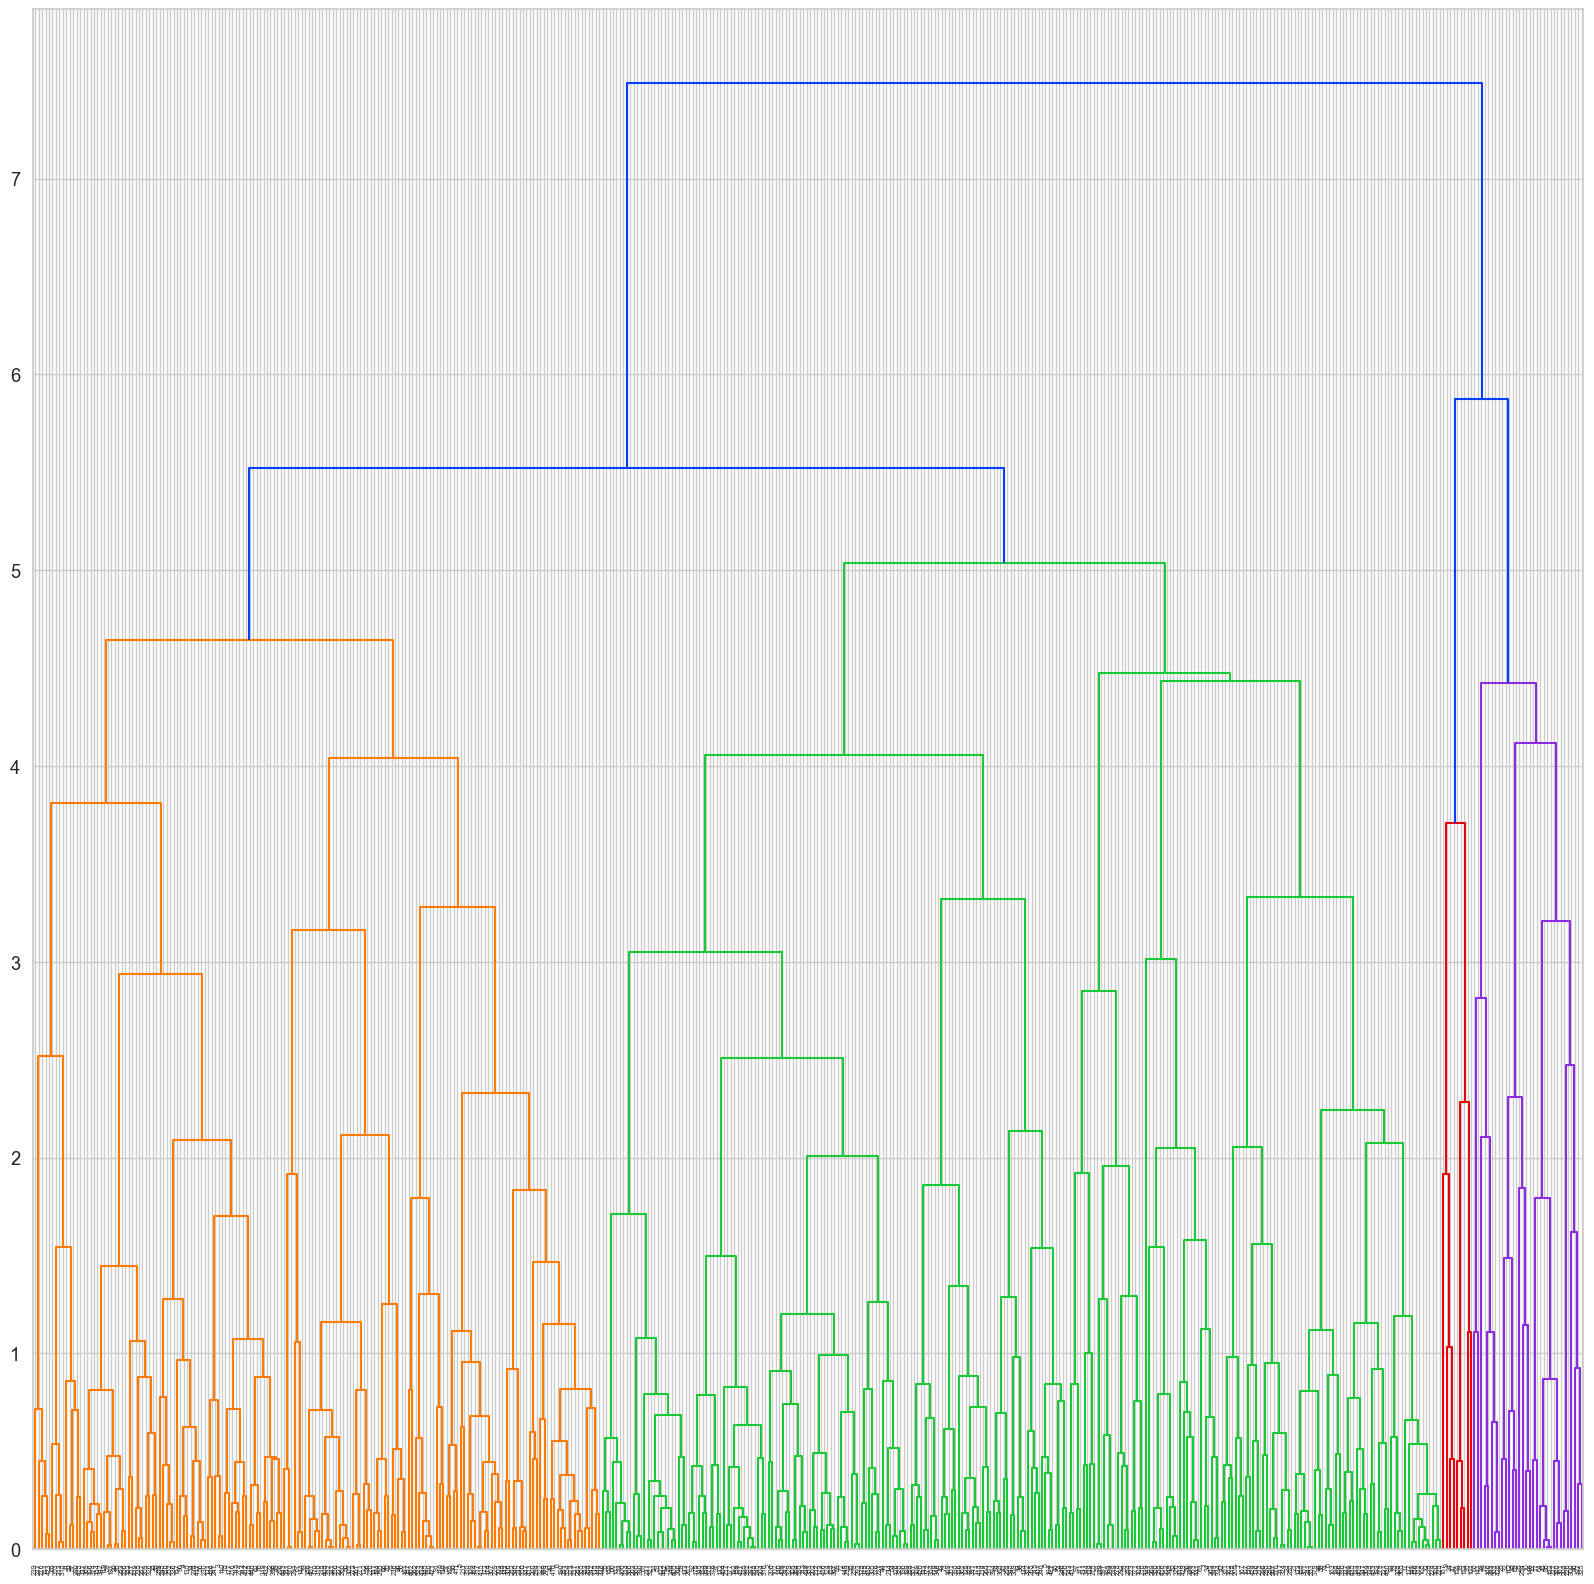

In [228]:
clusters = hierarchy.linkage(merged_to_vis_coded_scaled, method="complete")
dendrogram = hierarchy.dendrogram(clusters)

In [229]:
clustering_ag_av = AgglomerativeClustering(linkage="average", n_clusters=7).fit(merged_to_vis_coded_scaled)
labels_av = clustering_ag_av.labels_

clustering_ag_ward = AgglomerativeClustering(linkage="ward", n_clusters=9).fit(merged_to_vis_coded_scaled)
labels_ward = clustering_ag_ward.labels_

clustering_ag_single = AgglomerativeClustering(linkage="complete", n_clusters=9).fit(merged_to_vis_coded_scaled)
labels_single = clustering_ag_single.labels_

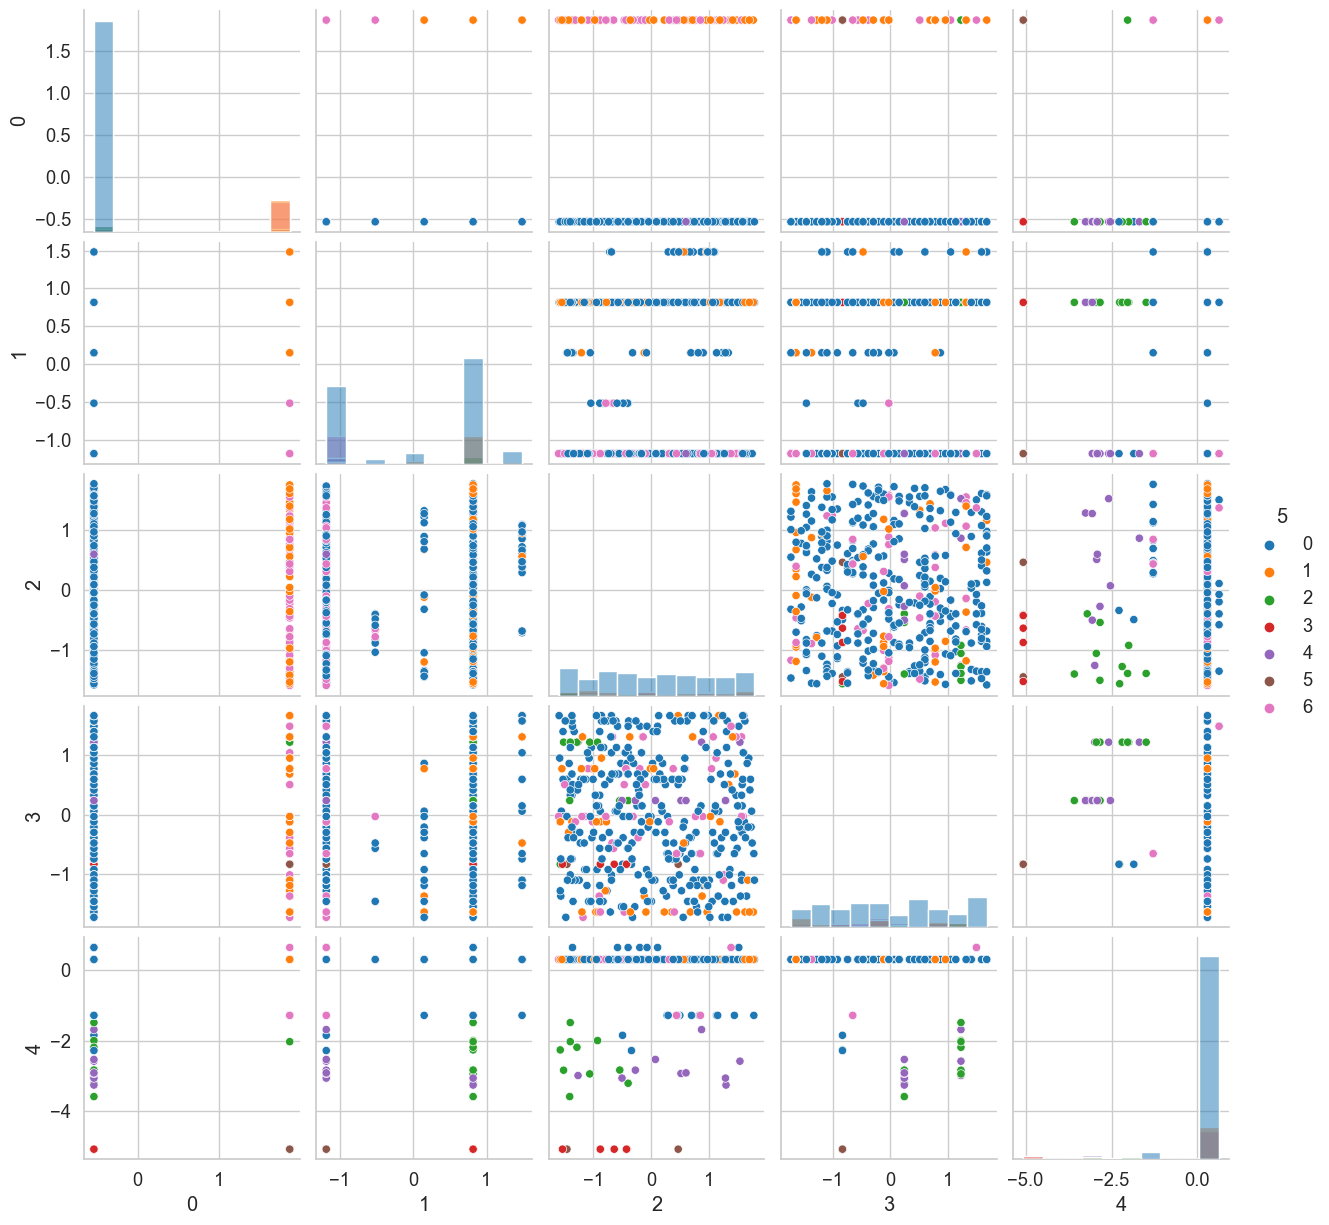

In [230]:
ier_dtataset = pd.concat([merged_to_vis_coded_scaled, pd.Series(labels_av)], ignore_index=True, axis=1)
sns.pairplot(ier_dtataset, diag_kind="hist", hue=5, palette="tab10")

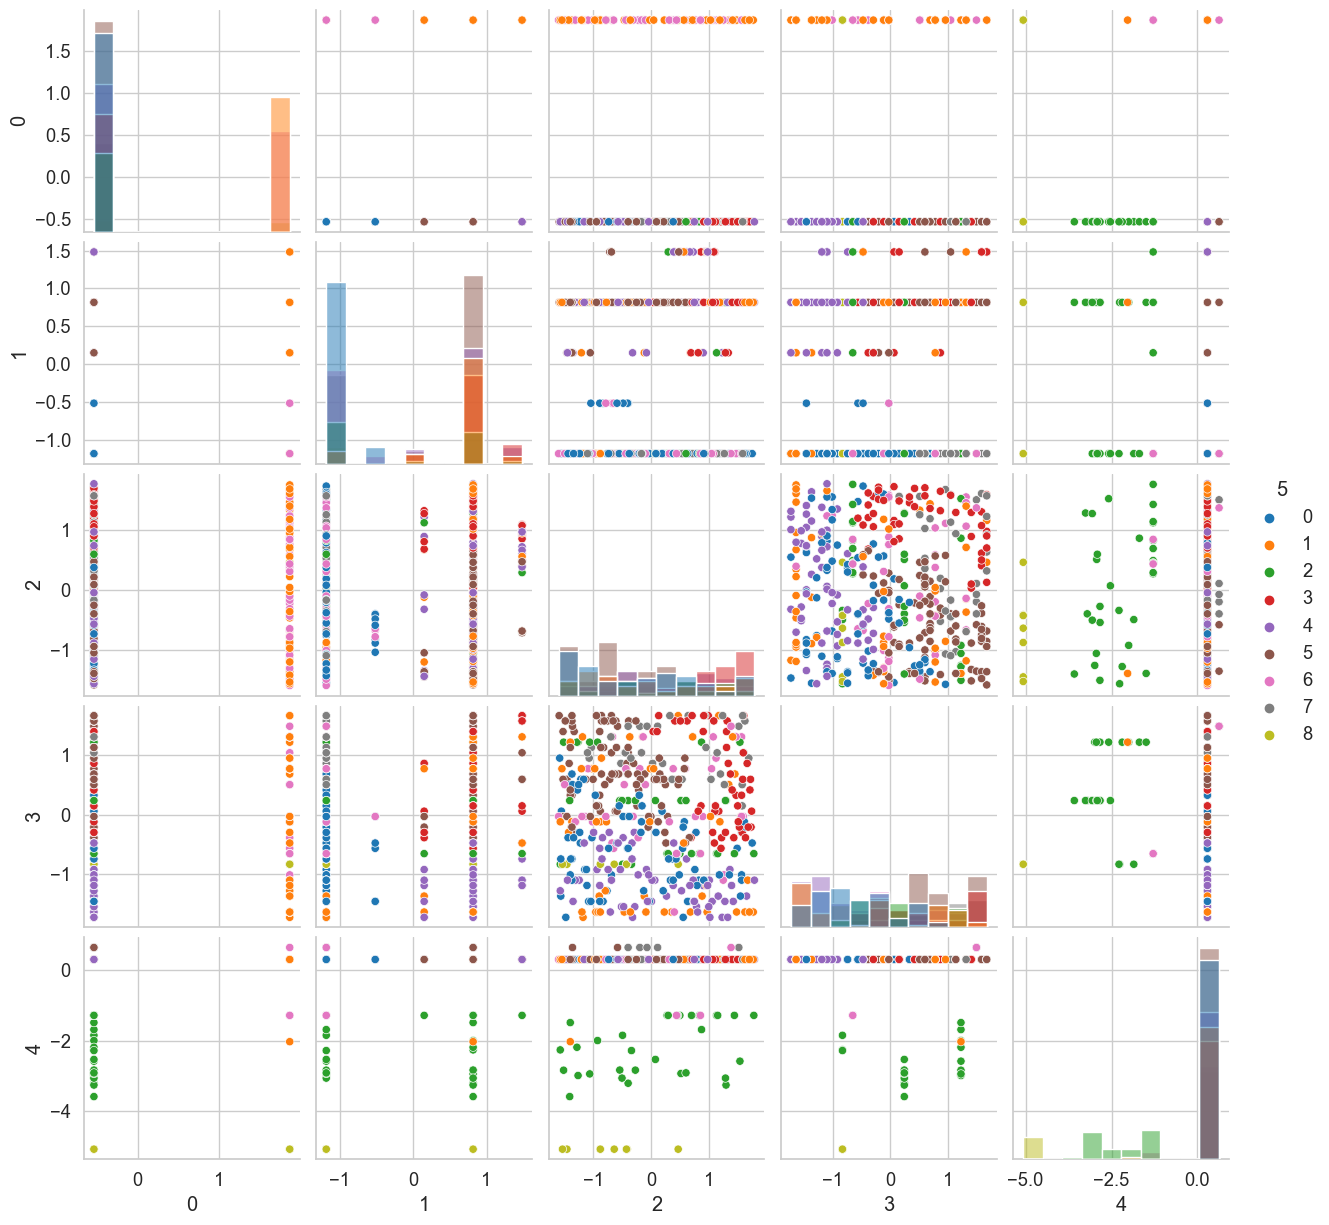

In [231]:
ier_dtataset = pd.concat([merged_to_vis_coded_scaled, pd.Series(labels_ward)], ignore_index=True, axis=1)
sns.pairplot(ier_dtataset, diag_kind="hist", hue=5, palette="tab10")

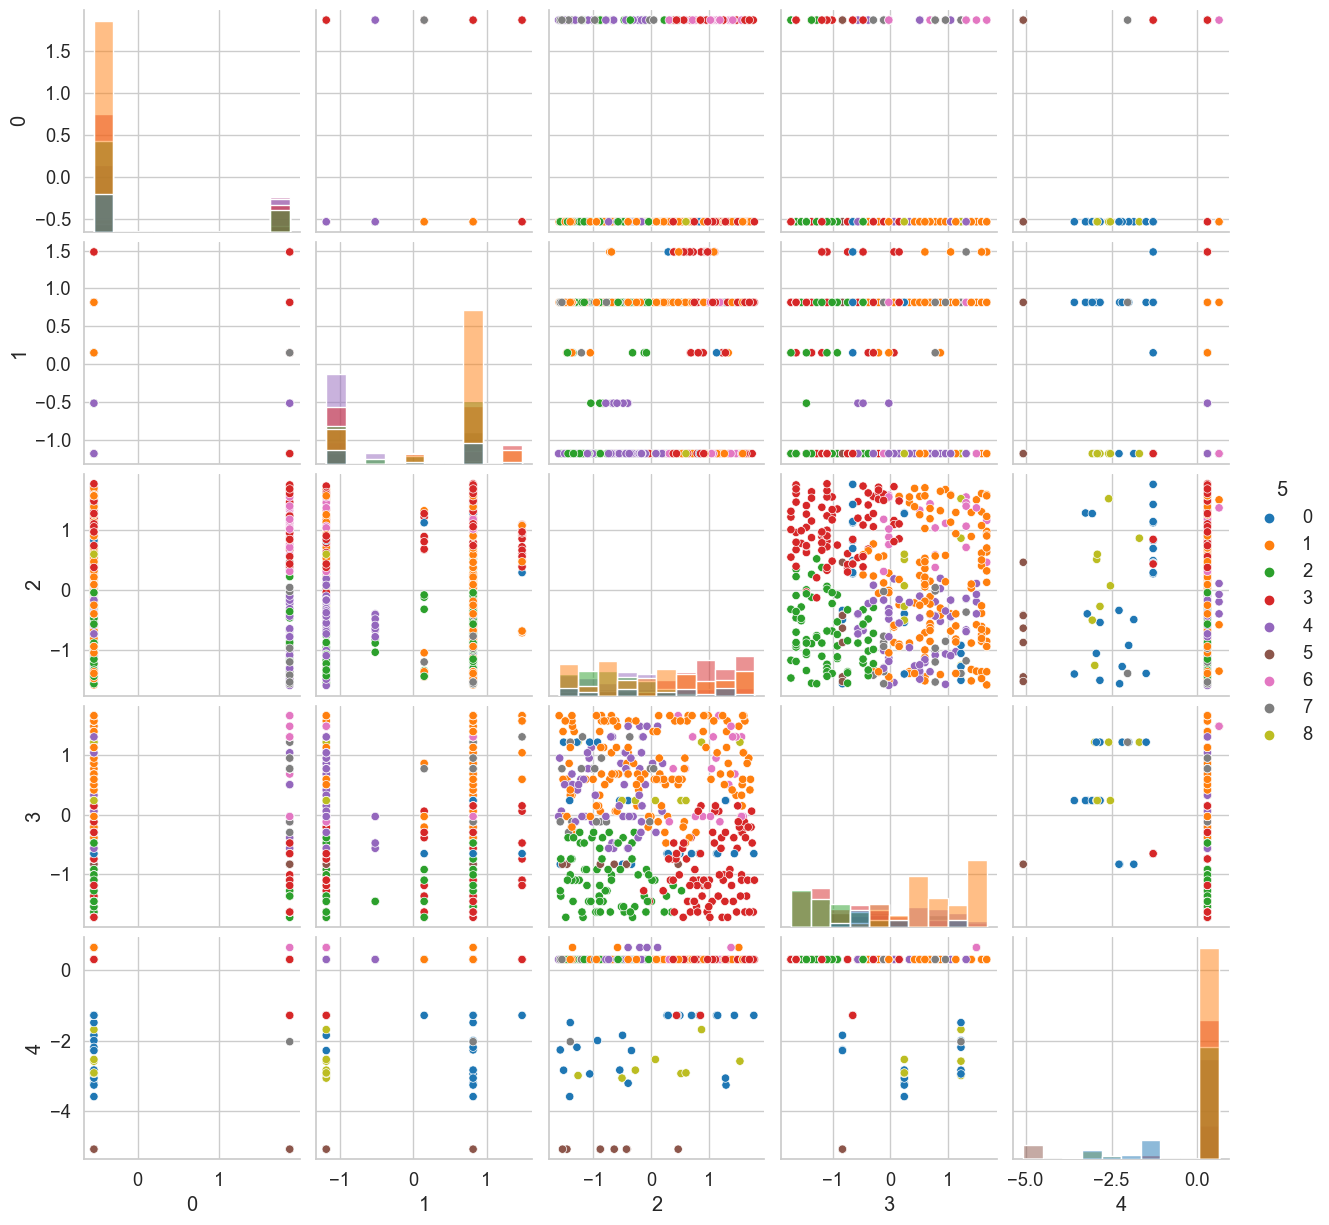

In [232]:
ier_dtataset = pd.concat([merged_to_vis_coded_scaled, pd.Series(labels_single)], ignore_index=True, axis=1)
sns.pairplot(ier_dtataset, diag_kind="hist", hue=5, palette="tab10")

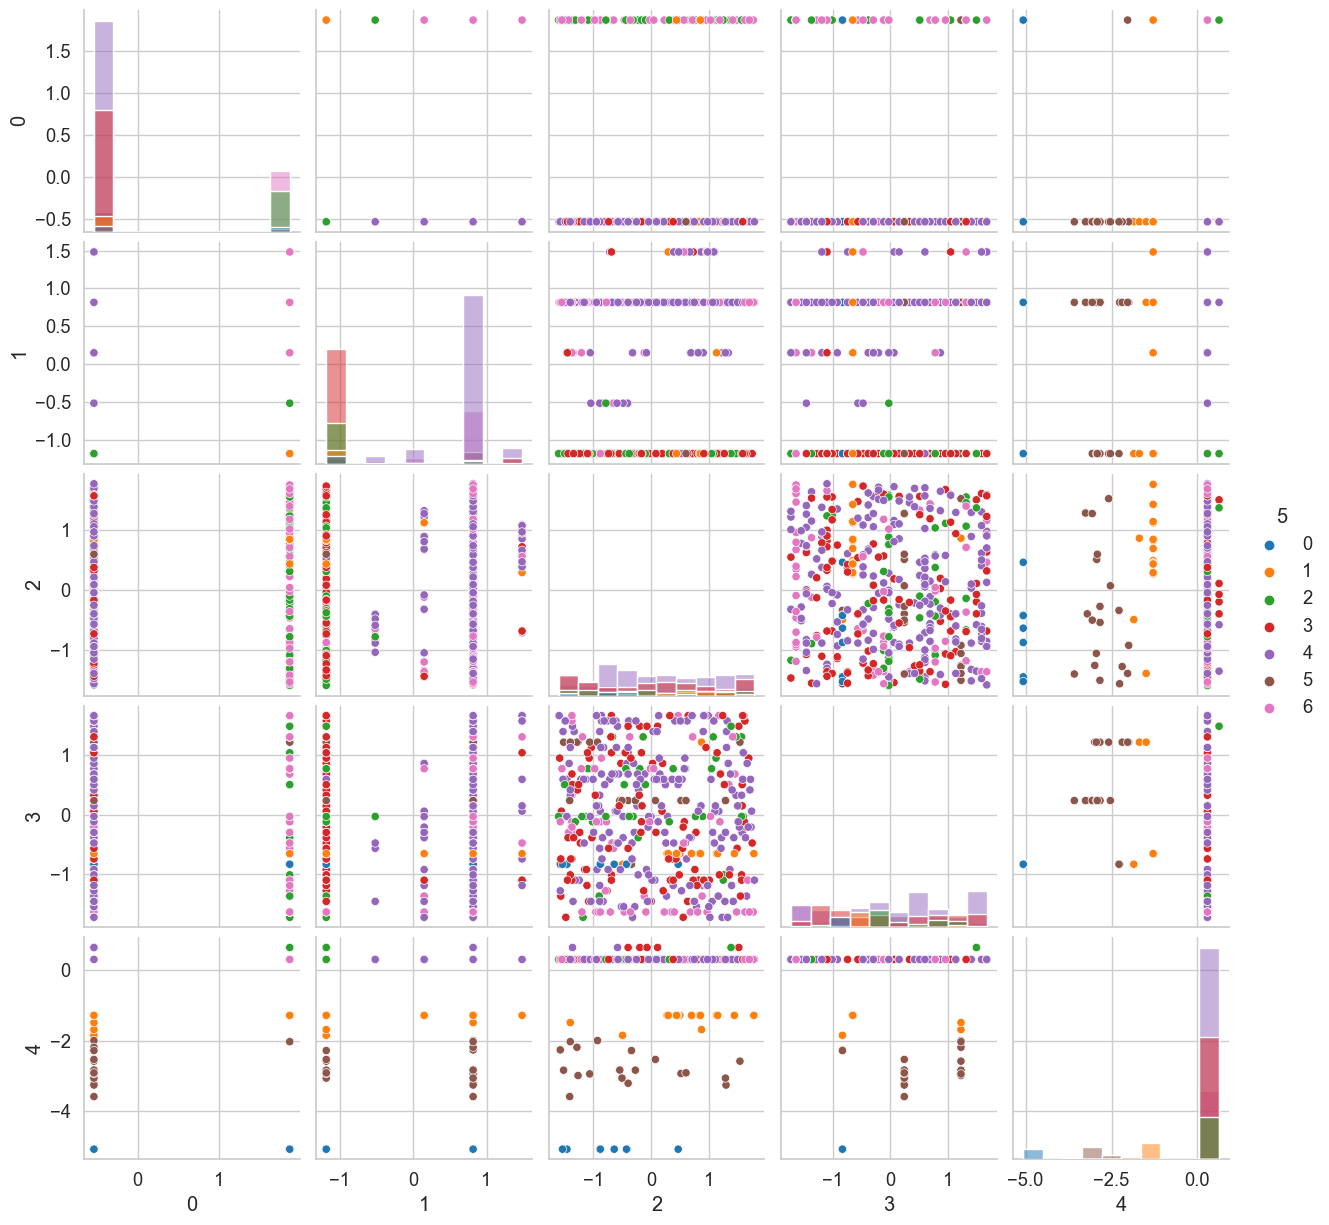

In [234]:
test_model = KPrototypes(n_clusters=7, random_state=42)
preds = test_model.fit_predict(merged_to_vis_coded_scaled, categorical=[0, 1, 2, 3])
ier_dtataset = pd.concat([merged_to_vis_coded_scaled, pd.Series(preds)], ignore_index=True, axis=1)
sns.pairplot(ier_dtataset, diag_kind="hist", hue=5, palette="tab10")

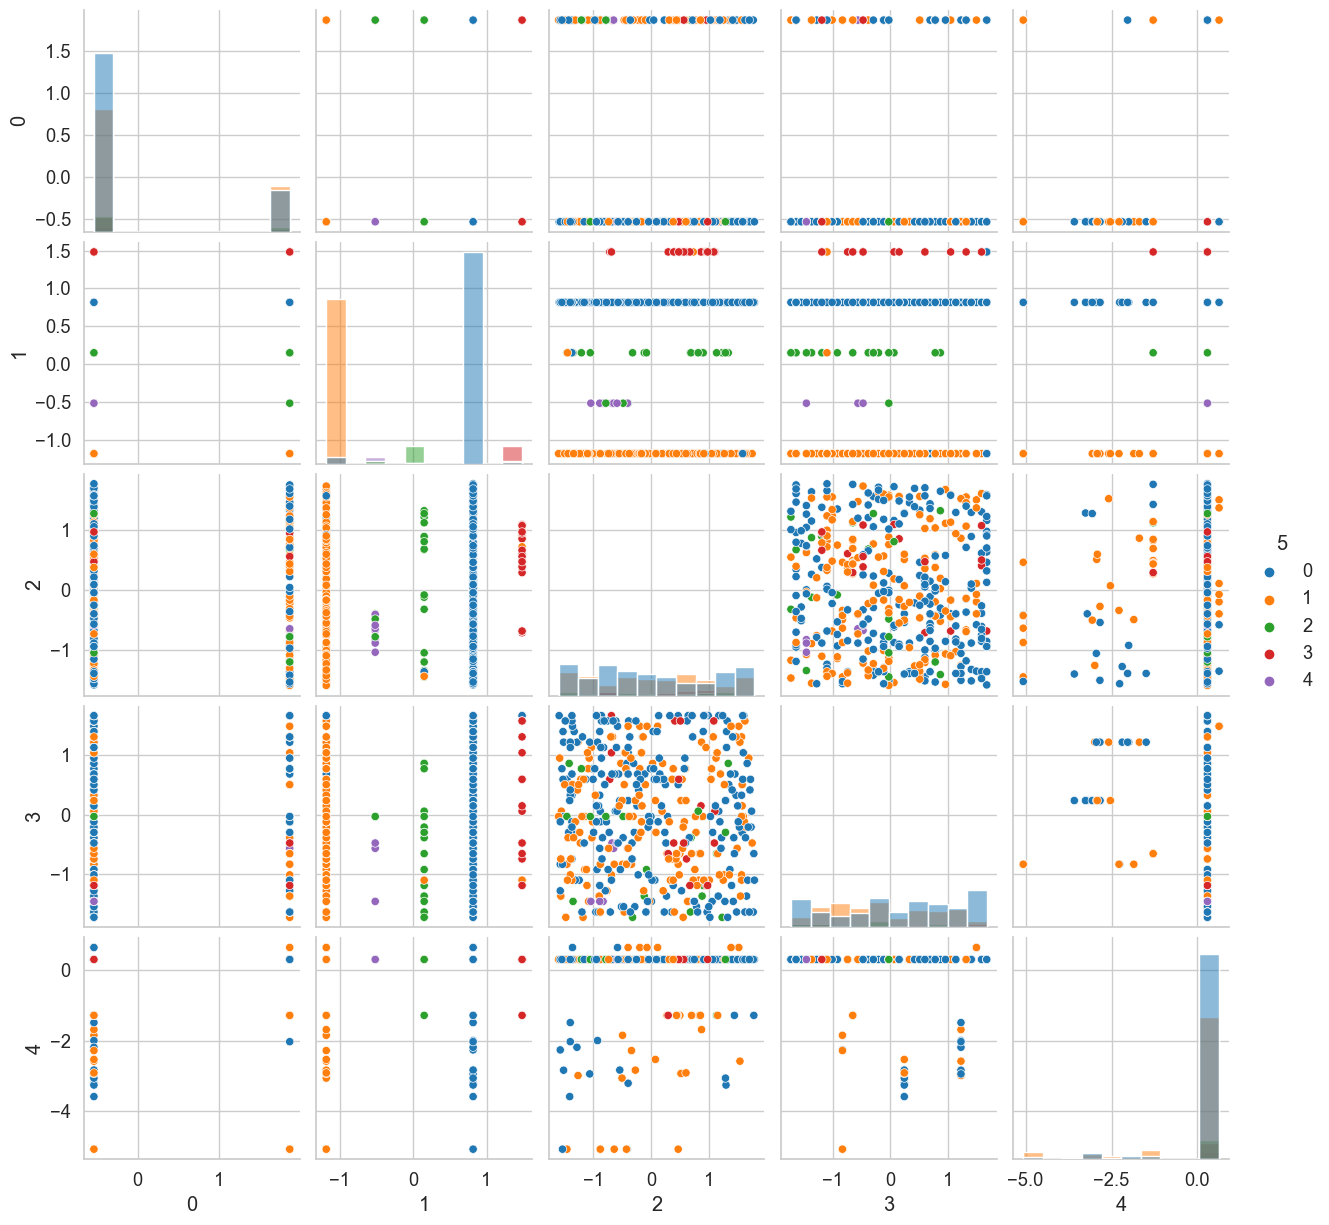

In [54]:
from kmodes.kmodes import KModes


kmodes = KModes(verbose=0,
                n_clusters=5, 
                random_state=42)

kmodes_clusters = kmodes.fit_predict(merged_to_vis_coded_scaled)
ier_dtataset = pd.concat([merged_to_vis_coded_scaled, pd.Series(kmodes_clusters)], ignore_index=True, axis=1)
sns.pairplot(ier_dtataset, diag_kind="hist", hue=5, palette="tab10")

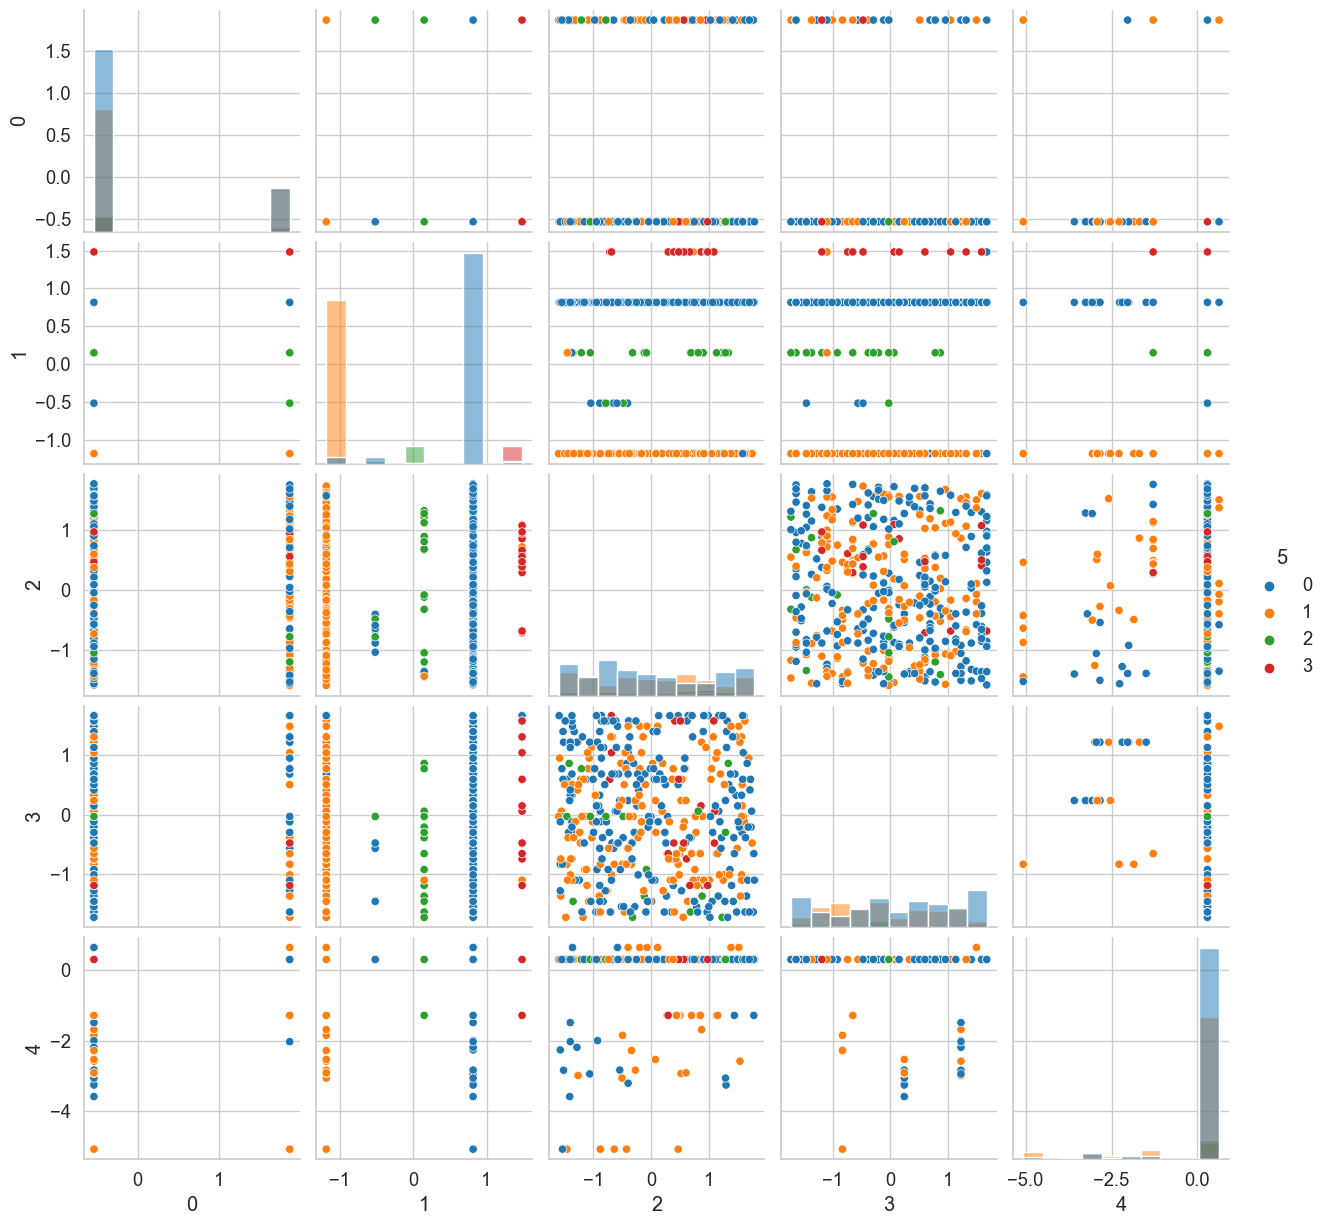

In [235]:
kmodes = KModes(verbose=0,
                n_clusters=4, 
                random_state=42)

kmodes_clusters = kmodes.fit_predict(merged_to_vis_coded_scaled)
ier_dtataset = pd.concat([merged_to_vis_coded_scaled, pd.Series(kmodes_clusters)], ignore_index=True, axis=1)
sns.pairplot(ier_dtataset, diag_kind="hist", hue=5, palette="tab10")

In [237]:
merged_to_vis_coded_scaled["clusters"] = kmodes_clusters

In [239]:
merged_to_vis_coded_scaled["family"] = main_data["ФИО"]

In [240]:
merged_to_vis_coded_scaled

,Пол,Категория,Место работы,Компетенция,"Баллы, ед.",clusters,family
0,-0.536056,-1.185890,-0.198545,1.491070,0.632407,1,ФИО_0
1,1.865476,0.816417,-0.150662,1.312651,0.293599,0,ФИО_1
2,-0.536056,1.483853,-0.715685,0.598977,0.293599,3,ФИО_2
3,-0.536056,0.816417,-1.242402,-1.096000,0.293599,0,ФИО_3
4,-0.536056,0.816417,0.519705,-1.274419,0.293599,0,ФИО_4
...,...,...,...,...,...,...,...
443,1.865476,-1.185890,0.433515,-0.649954,-1.287508,1,ФИО_443
444,-0.536056,0.816417,1.055999,-0.293116,0.293599,0,ФИО_444
445,1.865476,0.816417,1.688059,-1.631256,0.293599,0,ФИО_445
446,-0.536056,0.816417,-1.395628,1.134233,0.293599,0,ФИО_446


In [241]:
merged_to_vis_coded_scaled.to_csv(r'C:\Users\sahab\Desktop\csv\user_cluster.csv')

In [57]:
ier_dtataset.to_csv(r'C:\Users\sahab\Desktop\csv\user_cluster.csv')

In [93]:
main_data

,ФИО,Пол,Роль в мероприятии,Список компетенций,Должность,Категория,Начало трудового стажа,Место работы,Профессия,Дата рождения,Начало трудовой деятельности в РОСАТОМ,Образование,Место образования,Год оканчания,Специальность
0,ФИО_0,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,Инженер по подготовке производства,Инженер,1993-06-01,АО Чепецкий механический завод,Промышленная автоматика,1975-04-14,2001-01-25,NaN,NaN,NaN,NaN
1,ФИО_1,1,Участник мероприятия,Управление качеством;,Главный специалист,NaN,2000-08-01,Акционерное общество Научно-исследовательский...,NaN,1977-07-19,2021-09-14,NaN,NaN,NaN,NaN
2,ФИО_2,0,Участник мероприятия,Сварочные технологии;,Электрогазосварщик,NaN,NaN,"""Филиал Акционерного общества """"Русатом Инфрас...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ФИО_3,0,Участник мероприятия,Инженер-конструктор;,инженер-конструктор,NaN,июл.05,"""Акционерное Общество """"Машиностроительный зав...",NaN,23.06.1986,NaN,NaN,NaN,NaN,NaN
4,ФИО_4,0,Участник мероприятия,Геодезия;,Мастер-лаборант,NaN,NaN,ОБПОУ Курский монтажный техникум,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,ФИО_708,0,Участник мероприятия,Бетонные строительные работы;,Бетонщик,NaN,NaN,ООО Трест Рос Спец Энерго монтаж,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,ФИО_709,1,Участник мероприятия,Управление качеством;,Инженер по качеству,NaN,09.2013,"""ФГУП """"Приборостроительный завод""""""",NaN,22.06.1990,NaN,NaN,NaN,NaN,NaN
710,ФИО_710,1,Участник мероприятия,Аналитический контроль;,Лаборант химического анализа,NaN,2016-10-10,Центральная научно-исследовательская лаборатория,NaN,1993-02-01,2021-05-14,Высшее,ИрГУПС,2016,Эксплуатация железных дорог
711,ФИО_711,0,Участник мероприятия,Токарные работы на станках с ЧПУ;,токарь,NaN,NaN,"""АО """"Опытное Конструкторское Бюро Машинострое...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
concated_full_competition_data

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
707    106.0
708    106.0
709    106.0
710    106.0
711    106.0
Name: Баллы, ед., Length: 712, dtype: float64

In [145]:
concated_full_competition_data['Баллы, ед.'] = concated_full_competition_data['Баллы, ед.'].apply(lambda x: float(str(x).replace(',', '.')))
concated_full_competition_data['Баллы, %'] = concated_full_competition_data['Баллы, %'].apply(lambda x: float(str(x).replace(',', '.').replace('%', '')))
concated_full_competition_data_grouped = concated_full_competition_data.groupby('Компетенция').agg({'ФИО': 'count', 'Баллы, ед.': 'mean', 'Баллы, %': 'mean'})

concated_full_competition_data_grouped["Баллы, %"] = concated_full_competition_data_grouped["Баллы, %"].fillna(concated_full_competition_data_grouped["Баллы, %"].median())

In [148]:
concated_full_competition_data_grouped = concated_full_competition_data_grouped.reset_index()

In [149]:
concated_full_competition_data_grouped

,Компетенция,ФИО,"Баллы, ед.","Баллы, %"
0,Аддитивные технологии,7,100.000000,52.620000
1,Аналитический контроль,20,100.000000,44.152000
2,Бетонные строительные работы,15,100.000000,69.104000
3,Водитель спецавтомобиля,15,100.000000,51.631333
4,Вывод из эксплуатации объектов использования а...,32,100.000000,67.777500
5,Геодезия,12,100.000000,62.883333
6,Изготовление прототипов,9,100.000000,29.062222
7,Инженер-конструктор,20,100.000000,31.878000
8,Инженер-технолог машиностроения,9,100.000000,51.706667
9,Инженерное мышление. Каракури,24,100.000000,70.763750


In [150]:
def us_cnt(x):
    if x < 10:
        return 1
    if x >= 10 and x < 25:
        return 2
    if x >= 25 and x < 40:
        return 3
    if x >= 40:
        return 4
    
    
concated_full_competition_data_grouped["cnt_users"] = concated_full_competition_data_grouped["ФИО"].apply(lambda x: us_cnt(x))

In [156]:
concated_full_competition_data_grouped

,Компетенция,ФИО,"Баллы, ед.","Баллы, %",cnt_users
0,Аддитивные технологии,7,100.000000,52.620000,1
1,Аналитический контроль,20,100.000000,44.152000,2
2,Бетонные строительные работы,15,100.000000,69.104000,2
3,Водитель спецавтомобиля,15,100.000000,51.631333,2
4,Вывод из эксплуатации объектов использования а...,32,100.000000,67.777500,3
5,Геодезия,12,100.000000,62.883333,2
6,Изготовление прототипов,9,100.000000,29.062222,1
7,Инженер-конструктор,20,100.000000,31.878000,2
8,Инженер-технолог машиностроения,9,100.000000,51.706667,1
9,Инженерное мышление. Каракури,24,100.000000,70.763750,2


In [160]:
concated_full_competition_data_grouped.to_csv(r"C:\Users\sahab\Desktop\rijulya_ya_tebya_lublyu.csv")

In [157]:
concated_full_competition_data_grouped_for_train = concated_full_competition_data_grouped[["Баллы, %", "cnt_users"]]
concated_full_competition_data_grouped_for_train

,"Баллы, %",cnt_users
0,52.620000,1
1,44.152000,2
2,69.104000,2
3,51.631333,2
4,67.777500,3
5,62.883333,2
6,29.062222,1
7,31.878000,2
8,51.706667,1
9,70.763750,2


In [152]:
concated_full_competition_data_grouped_for_train.columns = [0, 1]

In [166]:
concated_full_competition_data_grouped_for_train = StandardScaler().fit_transform(concated_full_competition_data_grouped_for_train)

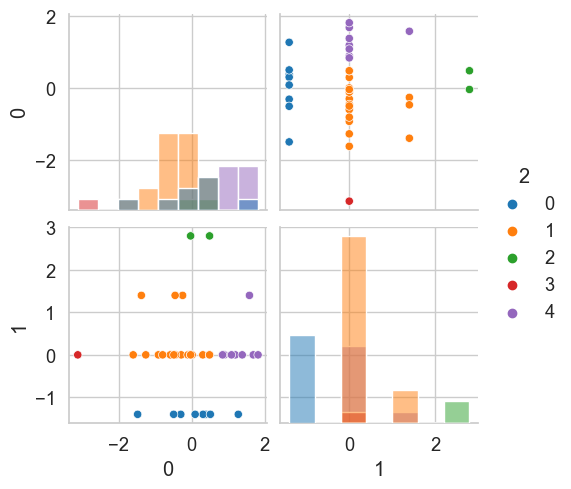

In [177]:
clustering_ag_ward = AgglomerativeClustering(linkage="average", n_clusters=5).fit(concated_full_competition_data_grouped_for_train)
labels_ward = clustering_ag_ward.labels_
ier_dtataset = pd.concat([pd.DataFrame(concated_full_competition_data_grouped_for_train), pd.Series(labels_ward)], ignore_index=True, axis=1)
ier_dtataset
sns.pairplot(ier_dtataset, diag_kind="hist", hue=2, palette="tab10")

In [172]:
concated_full_competition_data_grouped["Компетенция"].values

array(['Аддитивные технологии', 'Аналитический контроль',
       'Бетонные строительные работы', 'Водитель спецавтомобиля',
       'Вывод из эксплуатации объектов использования атомной энергии',
       'Геодезия', 'Изготовление прототипов', 'Инженер-конструктор',
       'Инженер-технолог машиностроения', 'Инженерное мышление. Каракури',
       'Инженерное проектирование', 'Информационная безопасность',
       'Квантовые технологии',
       'Корпоративная защита от внутренних угроз информационной безопасности',
       'Машинное обучение и большие данные', 'Мехатроника',
       'Неразрушающий контроль',
       'Обслуживание и ремонт оборудования релейной защиты и автоматики',
       'Охрана окружающей среды', 'Охрана труда',
       'Программные решения для бизнеса', 'Промышленная автоматика',
       'Промышленная механика и монтаж',
       'Работы на токарных универсальных станках',
       'Работы на фрезерных универсальных станках',
       'Радиационный контроль', 'Сварочные технологии'

,0,1,2
0,0.378760,-1.396424,3
1,-0.291856,0.000000,0
2,1.684194,0.000000,2
3,0.300463,0.000000,0
4,1.579143,1.396424,2
5,1.191554,0.000000,2
6,-1.486876,-1.396424,0
7,-1.263883,0.000000,0
8,0.306429,-1.396424,3
9,1.815637,0.000000,2


In [178]:
concated_full_competition_data_grouped["cluster"] = labels_ward
concated_full_competition_data_grouped

,Компетенция,ФИО,"Баллы, ед.","Баллы, %",cnt_users,cluster
0,Аддитивные технологии,7,100.000000,52.620000,1,0
1,Аналитический контроль,20,100.000000,44.152000,2,1
2,Бетонные строительные работы,15,100.000000,69.104000,2,4
3,Водитель спецавтомобиля,15,100.000000,51.631333,2,1
4,Вывод из эксплуатации объектов использования а...,32,100.000000,67.777500,3,4
5,Геодезия,12,100.000000,62.883333,2,4
6,Изготовление прототипов,9,100.000000,29.062222,1,0
7,Инженер-конструктор,20,100.000000,31.878000,2,1
8,Инженер-технолог машиностроения,9,100.000000,51.706667,1,0
9,Инженерное мышление. Каракури,24,100.000000,70.763750,2,4


In [179]:
concated_full_competition_data_grouped.to_csv(r"C:\Users\sahab\Desktop\rijulya_ya_tebya_lublyu.csv")

In [341]:
new_users

,0,1,2,3,4,5,6,7,8,9,10
0,-0.536056,-1.185890,-0.198545,1.491070,0.632407,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,АО Чепецкий механический завод,Цифровое ПСР-Предприятие (Lean Smart Plant),Промышленная автоматика
1,1.865476,0.816417,-0.150662,1.312651,0.293599,1,Участник мероприятия,Управление качеством;,Акционерное общество Научно-исследовательский...,Управление качеством,NaN
2,-0.536056,1.483853,-0.715685,0.598977,0.293599,0,Участник мероприятия,Сварочные технологии;,"""Филиал Акционерного общества """"Русатом Инфрас...",Сварочные технологии,NaN
3,-0.536056,0.816417,-1.242402,-1.096000,0.293599,0,Участник мероприятия,Инженер-конструктор;,"""Акционерное Общество """"Машиностроительный зав...",Инженер-конструктор,NaN
4,-0.536056,0.816417,0.519705,-1.274419,0.293599,0,Участник мероприятия,Геодезия;,ОБПОУ Курский монтажный техникум,Геодезия,NaN
...,...,...,...,...,...,...,...,...,...,...,...
443,1.865476,-1.185890,0.433515,-0.649954,-1.287508,1,Участник мероприятия,Квантовые технологии;,Национальный Исследовательский Томский Государ...,Квантовые технологии,NaN
444,-0.536056,0.816417,1.055999,-0.293116,0.293599,0,Участник мероприятия,Неразрушающий контроль;,Управление предприятия,Неразрушающий контроль,Неразрушающий контроль
445,1.865476,0.816417,1.688059,-1.631256,0.293599,1,Участник мероприятия,Аналитический контроль;,Центральная научно-исследовательская лаборатория,Аналитический контроль,NaN
446,-0.536056,0.816417,-1.395628,1.134233,0.293599,0,Участник мероприятия,Токарные работы на станках с ЧПУ;,"""АО """"Опытное Конструкторское Бюро Машинострое...",Токарные работы на станках с ЧПУ,NaN


In [343]:
new_data["IT"] = np.random.uniform(0, 1, len(new_data))
new_data["Физика"] = np.random.uniform(0, 1, len(new_data))
new_data["Гуманитарные науки"] = np.random.uniform(0, 1, len(new_data))
new_data["Строительство"] = np.random.uniform(0, 1, len(new_data))
new_data["Электроника"] = np.random.uniform(0, 1, len(new_data))

In [346]:
new_data.to_csv(r"C:\Users\sahab\Desktop\csv\new_us_dec_data.csv")

In [347]:
new_data

,Пол,Категория,Место работы,Компетенция,"Баллы, ед.",clusters,family,Пол_dec,Роль в мероприятии_dec,Список компетенций_dec,Место работы_dec,Компетенция_dec,Профессия_dec,IT,Физика,Гуманитарные науки,Строительство,Электроника
0,-0.536056,-1.185890,-0.198545,1.491070,0.632407,1,ФИО_0,0,Участник мероприятия,Цифровое ПСР-Предприятие (Lean Smart Plant);,АО Чепецкий механический завод,Цифровое ПСР-Предприятие (Lean Smart Plant),Промышленная автоматика,0.616905,0.884410,0.192416,0.210817,0.915777
1,1.865476,0.816417,-0.150662,1.312651,0.293599,0,ФИО_1,1,Участник мероприятия,Управление качеством;,Акционерное общество Научно-исследовательский...,Управление качеством,NaN,0.497596,0.634175,0.752185,0.606657,0.316765
2,-0.536056,1.483853,-0.715685,0.598977,0.293599,3,ФИО_2,0,Участник мероприятия,Сварочные технологии;,"""Филиал Акционерного общества """"Русатом Инфрас...",Сварочные технологии,NaN,0.497672,0.644937,0.224431,0.083128,0.736934
3,-0.536056,0.816417,-1.242402,-1.096000,0.293599,0,ФИО_3,0,Участник мероприятия,Инженер-конструктор;,"""Акционерное Общество """"Машиностроительный зав...",Инженер-конструктор,NaN,0.249340,0.346129,0.300306,0.029432,0.217055
4,-0.536056,0.816417,0.519705,-1.274419,0.293599,0,ФИО_4,0,Участник мероприятия,Геодезия;,ОБПОУ Курский монтажный техникум,Геодезия,NaN,0.318091,0.726605,0.420462,0.080049,0.917734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1.865476,-1.185890,0.433515,-0.649954,-1.287508,1,ФИО_443,1,Участник мероприятия,Квантовые технологии;,Национальный Исследовательский Томский Государ...,Квантовые технологии,NaN,0.062286,0.519659,0.841695,0.013828,0.652816
444,-0.536056,0.816417,1.055999,-0.293116,0.293599,0,ФИО_444,0,Участник мероприятия,Неразрушающий контроль;,Управление предприятия,Неразрушающий контроль,Неразрушающий контроль,0.540321,0.040128,0.820170,0.929689,0.044121
445,1.865476,0.816417,1.688059,-1.631256,0.293599,0,ФИО_445,1,Участник мероприятия,Аналитический контроль;,Центральная научно-исследовательская лаборатория,Аналитический контроль,NaN,0.209812,0.303664,0.029882,0.152384,0.123152
446,-0.536056,0.816417,-1.395628,1.134233,0.293599,0,ФИО_446,0,Участник мероприятия,Токарные работы на станках с ЧПУ;,"""АО """"Опытное Конструкторское Бюро Машинострое...",Токарные работы на станках с ЧПУ,NaN,0.263090,0.139302,0.603883,0.200480,0.832563
